# **Used Cars Price Prediction**



## **Context**

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

![cars image](https://i.imgur.com/6ikhTCQ.jpg)

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

## **Objectives**

To explore and visualize the dataset, build a pricing model (Linear Regression) that can effectively predict the price of used cars and generate a set of insights and recommendations that can help the business in devising profitable strategies. For example, if the business knows the market price, it will never sell anything below it.

## **Key Questions**

1. What are the factors that influence the selling price of a used car?
2. What is a good predictive model that outputs the selling price of a used car?

## **Data Description**

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

**Data Dictionary**

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
-Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
-Transmission: The type of transmission used by the car (Automatic/Manual)
-Owner: Type of ownership
-Mileage: The standard mileage offered by the car company in kmpl or km/kg
-Engine: The displacement volume of the engine in CC
-Power: The maximum power of the engine in bhp
-Seats: The number of seats in the car
-New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
-Price: The price of the used car in INR Lakhs

## **Setup**

**Importing Libraries**

In [ ]:
#import libraries and packages to help with reading and manipulating data
import pandas as pd
import numpy as np

#Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

In [ ]:
#restrict float value to 3 decimal places
pd.set_option('display.float_format',lambda x: '%.2f' % x)
%matplotlib inline

In [ ]:
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#allow access to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#load dataset and store into a dataframe
usedcar_df = pd.read_csv("/content/gdrive/MyDrive/UT-ML/Projects/Project2/used_cars_data.csv")

#make a separate copy of the original dataframe
usedcarworks_df = usedcar_df.copy()

## **EDA**

In [ ]:
#Check shape of the data: Number of rows and columns
print(f"There are {usedcar_df.shape[0]} rows and {usedcar_df.shape[1]} columns.")

There are 7253 rows and 14 columns.


In [ ]:
#head and tail of the dataframe to get an idea of the data
usedcarworks_df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,53.14,17.74


In [ ]:
usedcarworks_df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00,10.15,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.00,86.97,NaN


In [ ]:
# Lets look at 15 random rows
# Set the random seed via np.random.seed so that
# we produce the same random results every time
np.random.seed(1)
usedcarworks_df.sample(n=15)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.00,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.00,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.00,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.00,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.00,8.23,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.00,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.00,86.97,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.00,67.10,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.00,10.25,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.00,9.36,8.20


Observations

- Seems like S.No is actually an index number. We can drop it later.
- Mileage is in different units (i.e. km/kg, kmpl)
- Engine size, Mileage, Power have numerical values and text

In [ ]:
#general info, check data types and number of non-null values
usedcarworks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


Notice that there are 8 object types.

Name and Location can stay as objects.

Fuel Type, Transmission, Owner_Type, can be converted to dummy values.

Mileage, Engine, and Power can be converted to numerical values.

Notice that Price, Mileage, Engine, Power, and Seats have missing values.

We will see later in our analysis how to handle those features.

In [ ]:
# sorting by amount of missing values
usedcarworks_df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

Features 'Engine', 'Mileage', 'Power', 'Seats', 'Price' have null values.

Price is the feature with most missing values.

These have to be addressed during our analysis.

In [ ]:
#Duplicate Entries
usedcarworks_df.duplicated().sum()

0

There are no duplicated entries.

In [ ]:
#Lets look at the statistical summary of the data at this point
usedcarworks_df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.00,3626.00,2093.91,0.00,1813.00,3626.00,5439.00,7252.00
Year,7253.00,2013.37,3.25,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.00,58699.06,84427.72,171.00,34000.00,53416.00,73000.00,6500000.00
Seats,7200.00,5.28,0.81,0.00,5.00,5.00,5.00,10.00
New_Price,7253.00,21.31,24.26,3.91,7.88,11.30,21.69,375.00
Price,6019.00,9.48,11.19,0.44,3.50,5.64,9.95,160.00


Notice that as the data stands, the average of km driven is 58,699 and a maximum of 6'500,000 km were driven. This is very high and unusual number of km in any car odometer.
75% of cars have at 73,000 or less km and a mean of 58,699km.

There is also a very high new_price of INR 37'500,000.
75% of cars have a new price of INR 2'131.000. Is the highest new_price possible?

75% of cars have a used selling price of INR 995,000 a highest price of INR 16'000,000, and a mean price of INR 948,000. Since the highest new price is INR 37'500,000, we can assume that the highest used price of INR 16'000,000 may be possible if the first one is good.

We will look at each feature on detail next.



## **Univariate Analysis**

**S.No.**

In [ ]:
usedcarworks_df['S.No.']

0          0
1          1
2          2
3          3
4          4
        ... 
7248    7248
7249    7249
7250    7250
7251    7251
7252    7252
Name: S.No., Length: 7253, dtype: int64

S.No. is the Serial Number of the item on the dataset. This is actually the index of the item.

Since we have an index, this column can be dropped.

Next action: Drop the column.

In [ ]:
#Drop S.No.
usedcarworks_df['S.No.']
usedcarworks_df = usedcarworks_df.drop(['S.No.'], axis=1)
usedcarworks_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,16.06,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,13.23,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00,10.15,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00,9.47,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00,10.15,NaN


In [ ]:
#visualizing our 15 random rows
np.random.seed(1)
usedcarworks_df.sample(n=15)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.00,9.47,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.00,5.44,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.00,35.29,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.00,86.97,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.00,8.23,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.00,28.05,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.00,86.97,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.00,67.10,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.00,10.25,2.50
5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.00,9.36,8.20


We successfully dropped the S.No. Column.

**Name**

This column is a string that contains the brand, model, and some other valuable information that may be used later, like Engine size.

Next action: Use the column to determine Engine size for some Engine.

In [ ]:
usedcarworks_df['Name']

0                                  Maruti Wagon R LXI CNG
1                        Hyundai Creta 1.6 CRDi SX Option
2                                            Honda Jazz V
3                                       Maruti Ertiga VDI
4                         Audi A4 New 2.0 TDI Multitronic
                              ...                        
7248                    Volkswagen Vento Diesel Trendline
7249                               Volkswagen Polo GT TSI
7250                               Nissan Micra Diesel XV
7251                               Volkswagen Polo GT TSI
7252    Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...
Name: Name, Length: 7253, dtype: object

In [ ]:
usedcarworks_df['Name'].value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

There are too many different models described on the dataset.

Maybe Brand and model can be used to determine which models are the ones that have a higher selling price?

In [ ]:
#Create a new column to write down the Brands of the cars
carbrand = usedcarworks_df['Name'].str.split(" ", n=1, expand=True)
usedcarworks_df['Brand'] = carbrand[0]

In [ ]:
#How many cars per brand in the dataset?
print("There are ", str(usedcarworks_df['Brand'].nunique())," different car brands in the dataset")
usedcarworks_df['Brand'].value_counts()

There are  33  different car brands in the dataset


Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64

Notice that "Land" should be "Land Rover"

In [ ]:
#brand Land should be Land Rover, so fix that and check.
usedcarworks_df['Brand'] = usedcarworks_df['Brand'].replace({'Land':'Land Rover'}, regex=True)
usedcarworks_df['Brand'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64

In [ ]:
#visualize the head of the dataset now.
usedcarworks_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,5.51,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,16.06,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,11.27,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,53.14,17.74,Audi


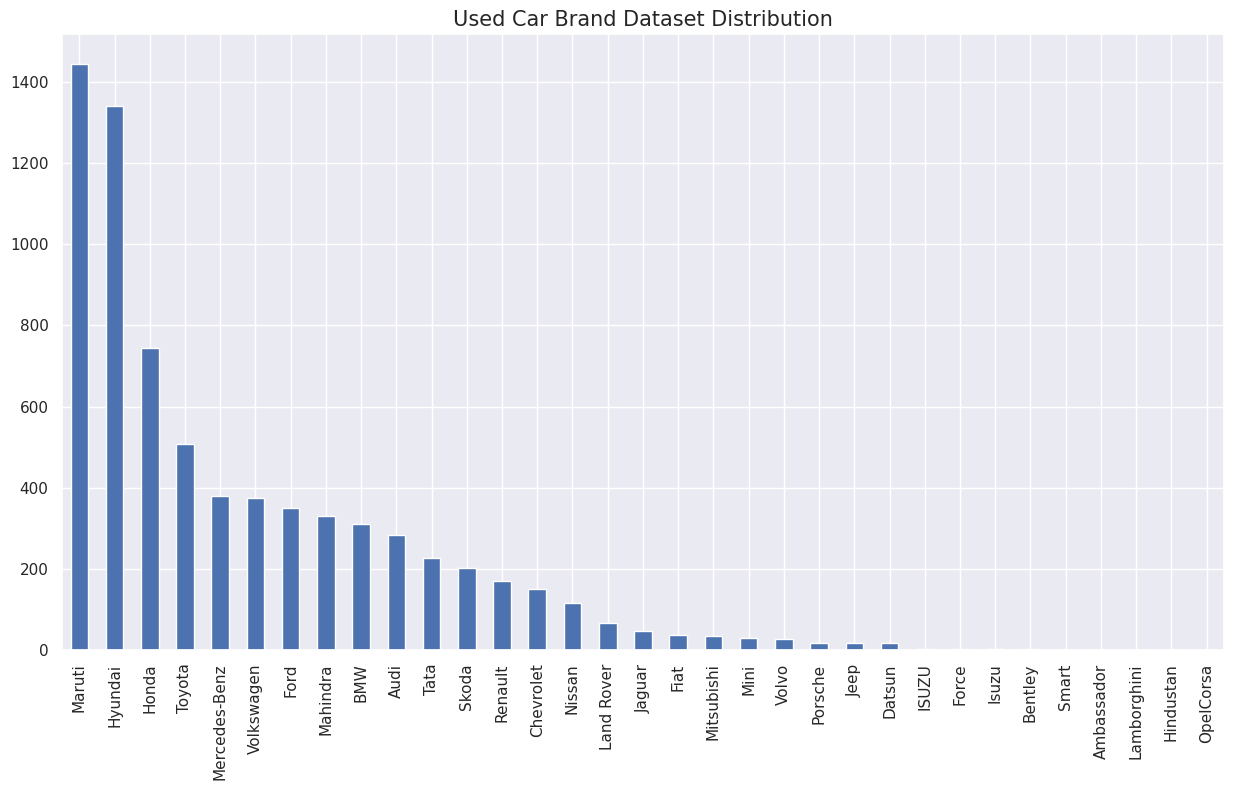

In [ ]:
#Visualize the brand distribution
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
usedcarworks_df['Brand'].value_counts().plot(kind="bar")
plt.title("Used Car Brand Dataset Distribution", fontsize=15)
plt.show()

Maruti and Hyundai are the 2 brands that have the most cars in the dataset, followed far behind by Honda.

Next: Should we try to convert to dummies so we can see how brand is correlated to price?

**Location**

The city where the car is at. This feature may be useful in determining how a location makes cars less/more expensive.

In [ ]:
#How many cars per brand in the dataset?
print("There are ", str(usedcarworks_df['Location'].nunique()), " different locations in the dataset.")
usedcarworks_df['Location'].value_counts()

There are  11  different locations in the dataset.


Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

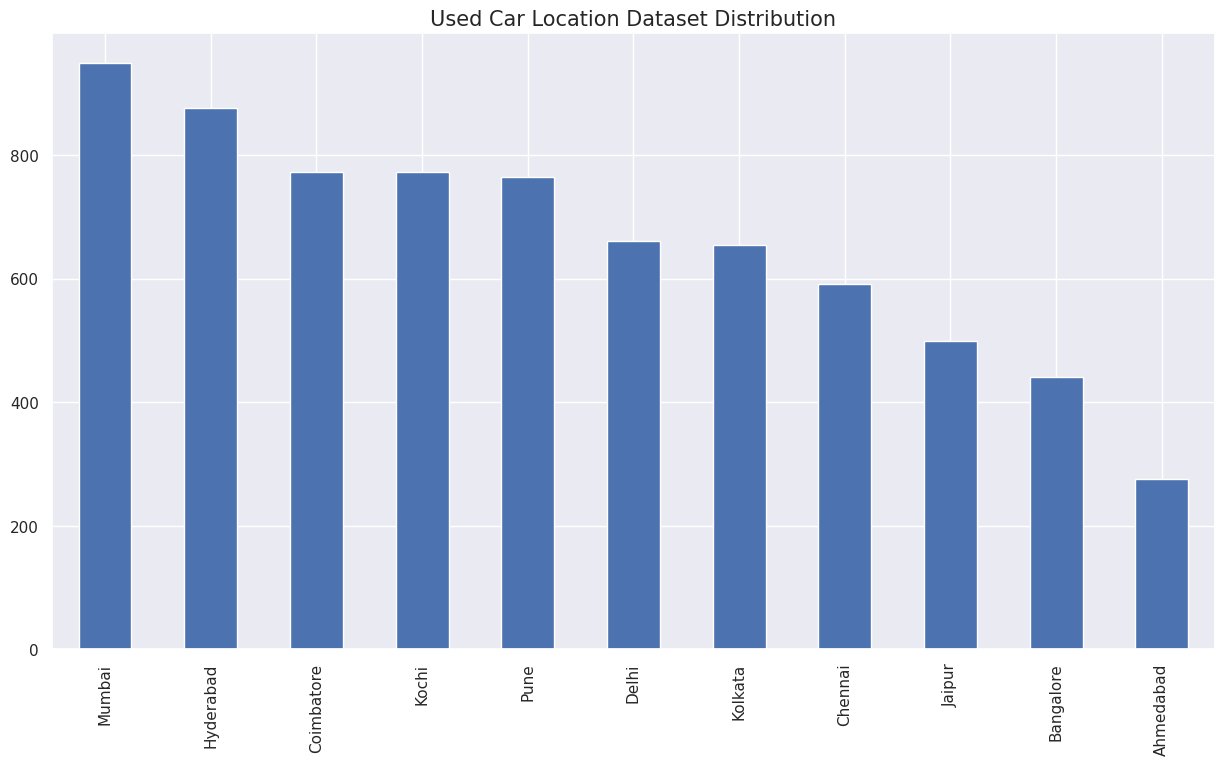

In [ ]:
#Visualize the location distribution
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
usedcarworks_df['Location'].value_counts().plot(kind="bar")
plt.title("Used Car Location Dataset Distribution", fontsize=15)
plt.show()

Mumbai and Hyderabad are the locations where most of the used cars are located in the dataset.

We can add geolocation longitude and latitude and map the locations. Also becaause there are only 11 locations we may be find useful to use dummy values to determine if a location makes a used car more/less expensive.

Location    Latitude  Longitude

Mumbai 19.076 72.878

Hyderabad 17.385 78.487

Coimbatore 11.016 76.970

Kochi 20.028 79.123

Pune 18.520 73.857  

Delhi 28.704 77.102

Kolkata 22.623 88.369

Chennai 13.0768 80.247

Jaipur 26.9112 75.787

Bangalore 12.9753 77.590

Ahmedabad 23.0271 72.593

If we have time, we will add these to our dataset


**Year**

The year of manufacture of the car is a number that by itself is categorical.


In [ ]:
#What are the years of cars in the dataset?
usedcarworks_df['Year'].value_counts()

2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64

In [ ]:
print("The latest year is ", str(usedcarworks_df['Year'].max()))

The latest year is  2019


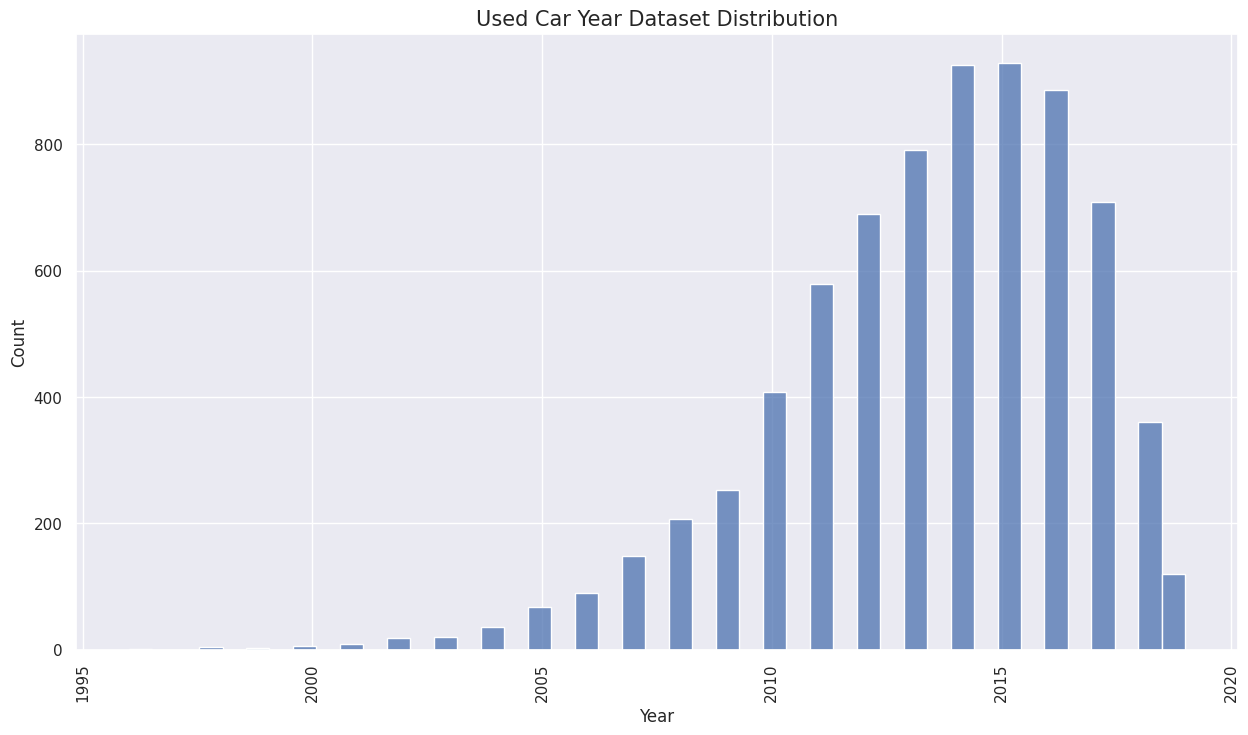

In [ ]:
#Visualize the yearly distribution
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.histplot(x=usedcarworks_df['Year'])
plt.title("Used Car Year Dataset Distribution", fontsize=15)
plt.show()

How about we derive an Age feature from the year of the car. This would be more meaningful in the analysis.

In [ ]:
#Assumption: Year of the dataset is 2020. Reason? Because the latest year as shown lines above is 2019. So lets assume that the year is 2020.
carage = 2020 - usedcarworks_df['Year']
usedcarworks_df['Age'] = carage

In [ ]:
#visualize the head to see the changes
usedcarworks_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,5.51,1.75,Maruti,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,16.06,12.50,Hyundai,5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61,4.50,Honda,9
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,11.27,6.00,Maruti,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,53.14,17.74,Audi,7


In [ ]:
#visualize the tail to see changes
usedcarworks_df.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Age
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,13.23,NaN,Volkswagen,9
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00,10.15,NaN,Volkswagen,5
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00,9.47,NaN,Nissan,8
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00,10.15,NaN,Volkswagen,7
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.00,86.97,NaN,Mercedes-Benz,6


Age of a car is one of the most imporant features that affect the selling price of a used car.

In [ ]:

usedcarworks_df['Age'].value_counts()

5     929
6     925
4     886
7     791
3     709
8     690
9     579
10    407
2     361
11    252
12    207
13    148
1     119
14     89
15     68
16     35
17     20
18     18
19      8
20      5
22      4
21      2
24      1
Name: Age, dtype: int64

The oldest car is 24 years old, and 5 years old is the most common.
We can drop the Year column.

In [ ]:
#Drop Year
usedcarworks_df = usedcarworks_df.drop(['Year'], axis=1)
usedcarworks_df

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Age
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,5.51,1.75,Maruti,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,16.06,12.50,Hyundai,5
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61,4.50,Honda,9
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,11.27,6.00,Maruti,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,53.14,17.74,Audi,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,13.23,NaN,Volkswagen,9
7249,Volkswagen Polo GT TSI,Mumbai,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00,10.15,NaN,Volkswagen,5
7250,Nissan Micra Diesel XV,Kolkata,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00,9.47,NaN,Nissan,8
7251,Volkswagen Polo GT TSI,Pune,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00,10.15,NaN,Volkswagen,7


Year was dropped. Instead now we have Age.

**Kilometers Driven**


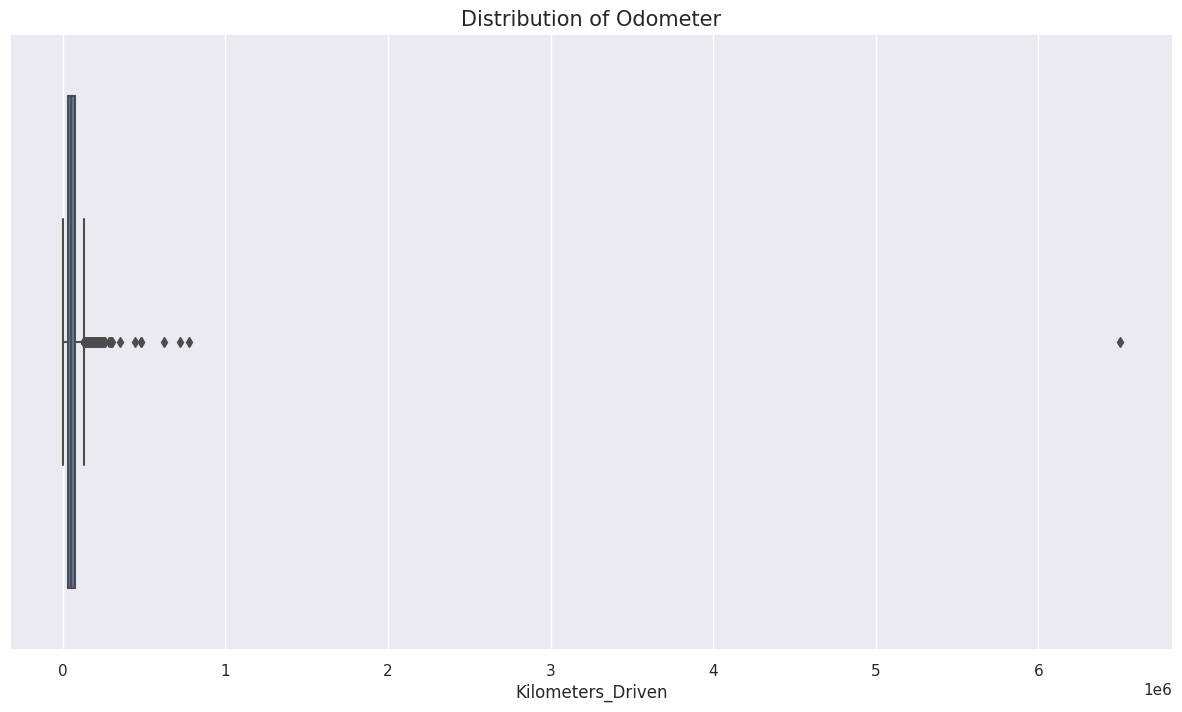

In [ ]:
#lets see the distribution of the kilometers driven
plt.figure(figsize=(15,8))
sns.boxplot(x = usedcarworks_df["Kilometers_Driven"])
plt.title("Distribution of Odometer", fontsize=15)
plt.show()

We can see an outlier at over 6,000,000 km.

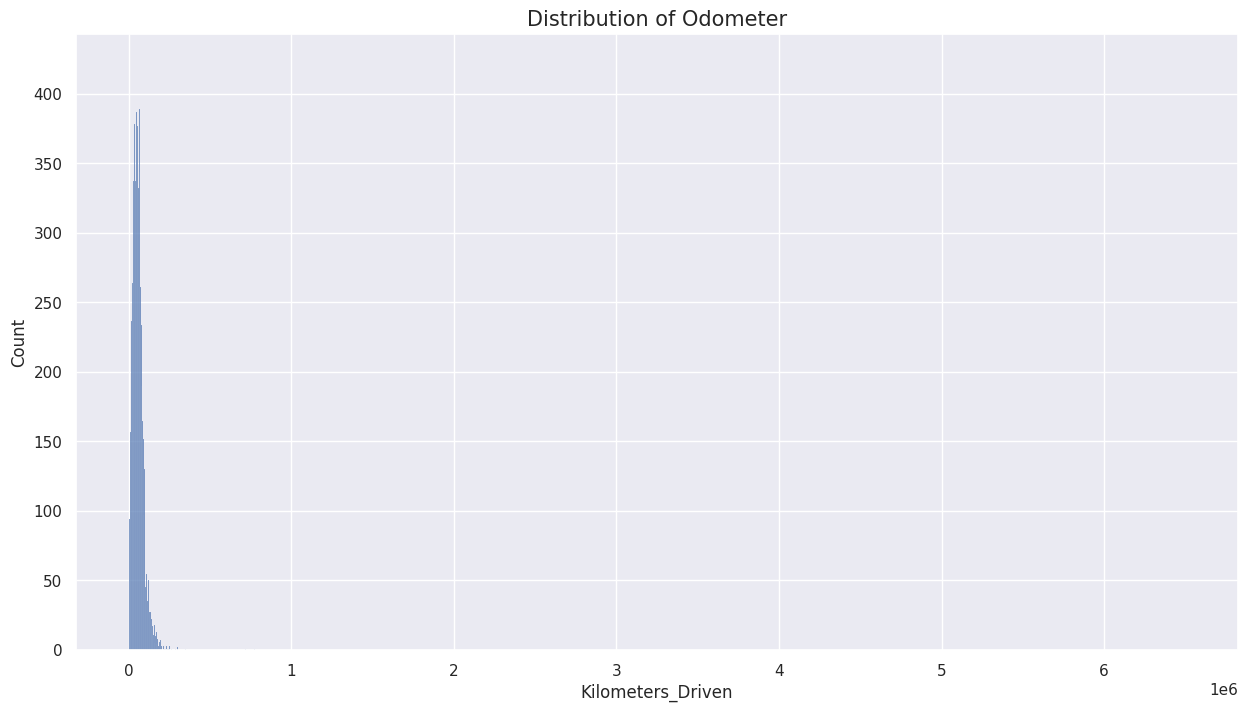

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=usedcarworks_df ,x="Kilometers_Driven")
plt.title("Distribution of Odometer", fontsize=15)
plt.show()

The odometer of a car is always a very important feature that affects the selling price of a used car.

Next: Watch out for that outlier.

In [ ]:
#What are the highest odometer readings?
usedcarworks_df.sort_values(by=['Kilometers_Driven'], ascending = False)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Age
2328,BMW X5 xDrive 30d M Sport,Chennai,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.00,55.07,65.00,BMW,3
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.00,25.83,7.50,Skoda,7
1860,Volkswagen Vento Diesel Highline,Chennai,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,13.23,5.90,Volkswagen,7
358,Hyundai i10 Magna 1.2,Chennai,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.00,10.25,2.70,Hyundai,11
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.00,10.15,13.00,Volkswagen,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,Hyundai i20 Active SX Dual Tone Petrol,Pune,1000,Petrol,Manual,First,17.19 kmpl,1197 CC,81.86 bhp,5.00,10.25,8.60,Hyundai,1
1598,Tata Xenon XT EX 4X2,Jaipur,1000,Diesel,Manual,First,13.49 kmpl,2179 CC,138.03 bhp,5.00,7.63,7.50,Tata,3
1242,Jaguar XE 2.0L Diesel Prestige,Delhi,1000,Diesel,Automatic,First,13.6 kmpl,1999 CC,177 bhp,5.00,52.77,40.00,Jaguar,2
5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,600,Petrol,Automatic,First,21.5 kmpl,1197 CC,81.80 bhp,5.00,6.80,6.25,Maruti,1


Can the BMW X5 xDrive 30d M Sport accumulated such large amount of miles?

Lets assume that the year is 2020. The car is 3 years old.

6500000/3 = 2'166,667 km per year or 5,936 per day. This is impossible!!! A car would have to travel at 247kmph continuously during 24 hours, for 3 years to achieve this.

If we assume that the year is 2022, and the car is 5 years old:

6500000/4 = 1'300,00 km per year or 3,561 km per day. This means that the car will have to travel at 148kmph continuously during 24 hours, for 5 years to achieve this. This is not feasible.


As a reference check this:
https://www.guinnessworldrecords.com/world-records/longest-driven-journey

So we can drop this value.  


In [ ]:
#Lets drop that unusually high value
usedcarworks_df.drop(usedcarworks_df[usedcarworks_df["Kilometers_Driven"]==usedcarworks_df['Kilometers_Driven'].max()].index,inplace=True)
usedcarworks_df.sort_values(by=['Kilometers_Driven'], ascending = False)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Age
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.00,25.83,7.50,Skoda,7
1860,Volkswagen Vento Diesel Highline,Chennai,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,13.23,5.90,Volkswagen,7
358,Hyundai i10 Magna 1.2,Chennai,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.00,10.25,2.70,Hyundai,11
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.00,10.15,13.00,Volkswagen,5
3092,Honda City i VTEC SV,Kolkata,480000,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.00,13.58,5.00,Honda,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Maruti Ignis 1.2 Alpha,Mumbai,1000,Petrol,Manual,First,20.89 kmpl,1197 CC,81.80 bhp,5.00,7.87,6.36,Maruti,3
2646,Ford Figo 2015-2019 1.2P Sports Edition MT,Mumbai,1000,Petrol,Manual,First,18.12 kmpl,1196 CC,86.8 bhp,5.00,7.65,6.80,Ford,1
1598,Tata Xenon XT EX 4X2,Jaipur,1000,Diesel,Manual,First,13.49 kmpl,2179 CC,138.03 bhp,5.00,7.63,7.50,Tata,3
5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,600,Petrol,Automatic,First,21.5 kmpl,1197 CC,81.80 bhp,5.00,6.80,6.25,Maruti,1


That car that had the unusually high number of km was dropped.

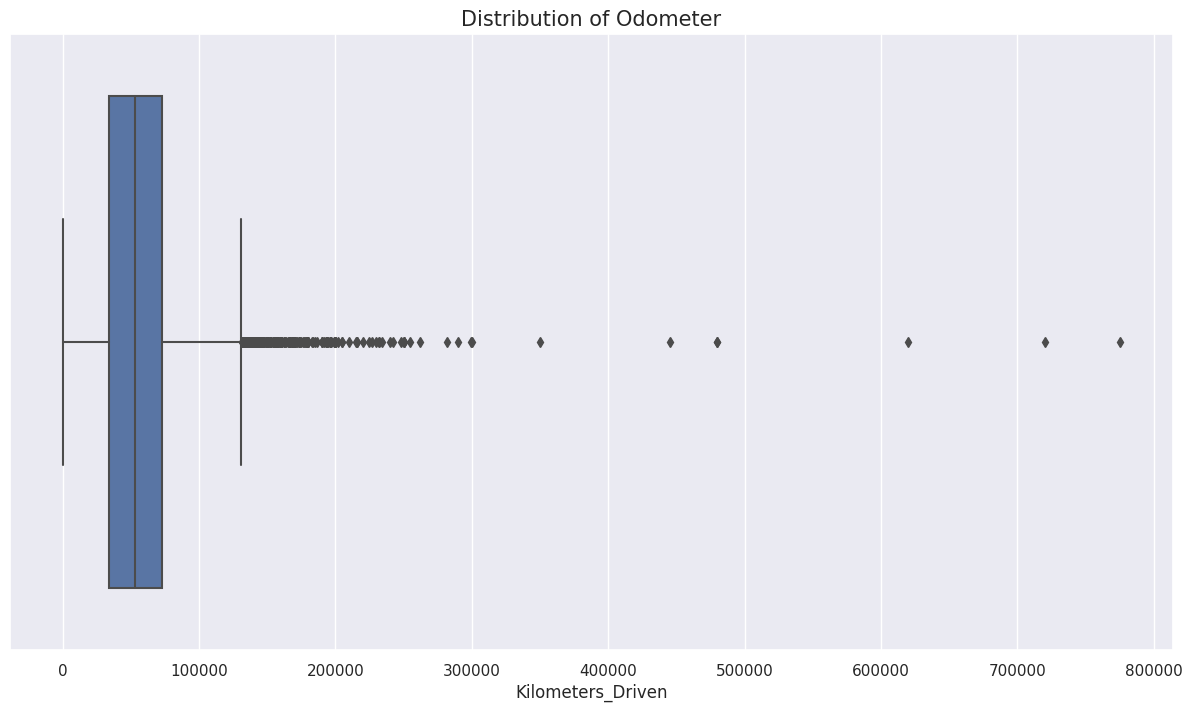

In [ ]:
#revisit the odometer
#lets see the distribution of the kilometers driven
plt.figure(figsize=(15,8))
sns.boxplot(x = usedcarworks_df["Kilometers_Driven"])
plt.title("Distribution of Odometer", fontsize=15)
plt.show()

In [ ]:
usedcarworks_df.sort_values(by=['Kilometers_Driven'], ascending = False).head(20)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Age
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.00,25.83,7.50,Skoda,7
1860,Volkswagen Vento Diesel Highline,Chennai,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,13.23,5.90,Volkswagen,7
358,Hyundai i10 Magna 1.2,Chennai,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.00,10.25,2.70,Hyundai,11
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.00,10.15,13.00,Volkswagen,5
3092,Honda City i VTEC SV,Kolkata,480000,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.00,13.58,5.00,Honda,5
4491,Hyundai i20 Magna Optional 1.2,Bangalore,445000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.00,10.25,4.45,Hyundai,7
6921,Maruti Swift Dzire Tour LDI,Jaipur,350000,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.00,7.88,NaN,Maruti,8
3649,Tata Indigo LS,Jaipur,300000,Diesel,Manual,First,17.0 kmpl,1405 CC,70 bhp,5.00,7.63,1.00,Tata,12
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,299322,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,8.00,24.01,4.00,Toyota,15
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,290000,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.00,33.68,NaN,ISUZU,3


Take a look at index 340 and 1860, surpassing 700,000 km. Is this possible?
So index 340, with 775,000 km in 7 years represent rougly 111 km/year or 303 km/day. Can a car run 303 km/day? Yes, this is possible! Assume that every day, a car goes back and forth between city A and city B and the distance is 150km. The car goes at an avergae of speed of 50km/hr. So in average, the car can complete the trip in 3 hours one way or 6 hours round trip. So this is very possible.

After looking at all other high km cars, we conclude that those outliers are good data.


**Fuel Type**

Fue Type is a categorical value that contains the units of Fuel.
There are no null values in this column.

In [ ]:
#Fuel_type
#How many different types of Fuel_Type?
usedcarworks_df['Fuel_Type'].value_counts()

Diesel      3851
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

Lets take a look at every type of FUel Type.

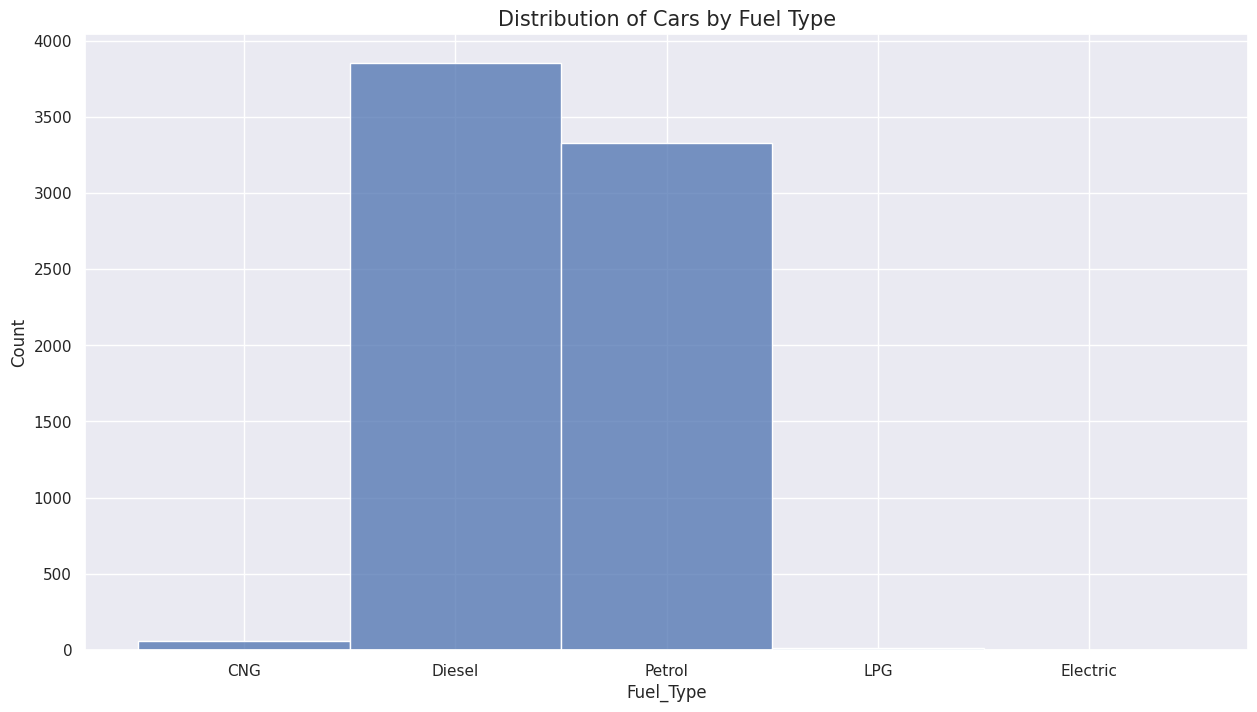

In [ ]:
#lets see the distribution of cars by fuel type
plt.figure(figsize=(15,8))
sns.histplot(data=usedcarworks_df,x='Fuel_Type')
plt.title("Distribution of Cars by Fuel Type", fontsize=15)
plt.show()

Most cars are Diesel and Petrol (Gasoline).

***Diesel Cars***

In [ ]:
#Lets look at DIESEL cars
dieselcars_df = usedcarworks_df[usedcarworks_df['Fuel_Type']== 'Diesel']
dieselcars_df

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Age
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,16.06,12.50,Hyundai,5
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,11.27,6.00,Maruti,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,53.14,17.74,Audi,7
6,Nissan Micra Diesel XV,Jaipur,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00,9.47,3.50,Nissan,7
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.00,21.00,17.50,Toyota,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7241,BMW 5 Series 525d Sedan,Delhi,80000,Diesel,Automatic,First,16.73 kmpl,2993 CC,218 bhp,5.00,67.87,NaN,BMW,8
7243,Renault Duster 85PS Diesel RxL,Chennai,70000,Diesel,Manual,First,19.87 kmpl,1461 CC,83.8 bhp,5.00,15.05,NaN,Renault,5
7248,Volkswagen Vento Diesel Trendline,Hyderabad,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,13.23,NaN,Volkswagen,9
7250,Nissan Micra Diesel XV,Kolkata,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00,9.47,NaN,Nissan,8


not much to determine from this yet

In [ ]:
#What are the most expensive Diesel
dieselcars_df.sort_values(by=['Price'], ascending = False).head(20)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Age
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,25000,Diesel,Automatic,First,13.33 kmpl,2993 CC,255 bhp,5.00,230.00,160.00,Land Rover,3
1505,Land Rover Range Rover Sport SE,Kochi,26013,Diesel,Automatic,First,12.65 kmpl,2993 CC,255 bhp,5.00,139.00,97.07,Land Rover,1
5535,BMW X6 xDrive 40d M Sport,Ahmedabad,97003,Diesel,Automatic,First,15.87 kmpl,2993 CC,308.43 bhp,5.00,55.07,85.00,BMW,5
2422,Jaguar XJ 3.0L Portfolio,Delhi,12000,Diesel,Automatic,First,10.5 kmpl,2993 CC,271.23 bhp,4.00,69.67,79.00,Jaguar,4
1885,Mercedes-Benz GLS 350d Grand Edition,Delhi,6000,Diesel,Automatic,First,11.0 kmpl,2987 CC,258 bhp,7.00,102.00,79.00,Mercedes-Benz,2
2319,Mercedes-Benz E-Class E 350 d,Coimbatore,9312,Diesel,Automatic,First,18.0 kmpl,2987 CC,258 bhp,5.00,92.50,78.80,Mercedes-Benz,1
3489,Porsche Panamera Diesel,Bangalore,19828,Diesel,Automatic,Second,17.85 kmpl,2967 CC,300 bhp,4.00,136.00,75.00,Porsche,7
2659,Porsche Panamera Diesel,Kolkata,25100,Diesel,Automatic,First,17.85 kmpl,2967 CC,300 bhp,4.00,136.00,75.00,Porsche,5
2907,Jaguar XJ 3.0L Portfolio,Hyderabad,26000,Diesel,Automatic,First,14.47 kmpl,2993 CC,301.73 bhp,5.00,69.67,75.00,Jaguar,5
1583,Audi Q7 45 TDI Quattro Premium Plus,Kochi,6773,Diesel,Automatic,First,14.75 kmpl,2967 CC,245 bhp,7.00,91.38,72.94,Audi,1


In [ ]:
dieselcars_df.sort_values(by=['Kilometers_Driven'], ascending = False).head(20)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Age
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.00,25.83,7.50,Skoda,7
1860,Volkswagen Vento Diesel Highline,Chennai,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,13.23,5.90,Volkswagen,7
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.00,10.15,13.00,Volkswagen,5
6921,Maruti Swift Dzire Tour LDI,Jaipur,350000,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.00,7.88,NaN,Maruti,8
3649,Tata Indigo LS,Jaipur,300000,Diesel,Manual,First,17.0 kmpl,1405 CC,70 bhp,5.00,7.63,1.00,Tata,12
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,299322,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,8.00,24.01,4.00,Toyota,15
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,290000,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.00,33.68,NaN,ISUZU,3
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,262000,Diesel,Manual,Fourth & Above,12.8 kmpl,2494 CC,102 bhp,7.00,24.01,4.00,Toyota,13
1846,Toyota Innova 2.5 GX (Diesel) 7 Seater,Pune,255000,Diesel,Manual,Third,12.99 kmpl,2494 CC,100.6 bhp,7.00,24.01,6.50,Toyota,7
4719,Toyota Innova 2.5 GX (Diesel) 8 Seater,Chennai,250000,Diesel,Manual,First,12.99 kmpl,2494 CC,100.6 bhp,8.00,24.01,10.90,Toyota,6


***Petrol Cars***

In [ ]:
#lets see the PETROL Cars
petrolcars_df = usedcarworks_df[usedcarworks_df['Fuel_Type']=='Petrol']
petrolcars_df

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Age
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61,4.50,Honda,9
10,Maruti Ciaz Zeta,Kochi,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.00,10.65,9.95,Maruti,2
11,Honda City 1.5 V AT Sunroof,Kolkata,60000,Petrol,Automatic,First,16.8 kmpl,1497 CC,116.3 bhp,5.00,13.58,4.49,Honda,8
22,Audi A6 2011-2015 35 TFSI Technology,Mumbai,55985,Petrol,Automatic,First,13.53 kmpl,1984 CC,177.01 bhp,5.00,67.10,23.50,Audi,5
23,Hyundai i20 1.2 Magna,Kolkata,45807,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.00,10.25,1.87,Hyundai,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,Honda Amaze S i-Vtech,Kochi,44776,Petrol,Manual,First,18.0 kmpl,1198 CC,86.7 bhp,5.00,8.54,NaN,Honda,5
7246,Hyundai Grand i10 AT Asta,Coimbatore,18242,Petrol,Automatic,First,18.9 kmpl,1197 CC,82 bhp,5.00,7.45,NaN,Hyundai,4
7247,Hyundai EON D Lite Plus,Coimbatore,21190,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.00,10.25,NaN,Hyundai,5
7249,Volkswagen Polo GT TSI,Mumbai,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00,10.15,NaN,Volkswagen,5


The mileage range for petrol cars seems to be ok.

***CNG Cars***

In [ ]:
#lets see the CNG
cngcars_df = usedcarworks_df[usedcarworks_df['Fuel_Type']=='CNG']
cngcars_df

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Age
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,5.51,1.75,Maruti,10
127,Maruti Wagon R LXI CNG,Pune,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,5.51,3.25,Maruti,7
328,Maruti Zen Estilo LXI Green (CNG),Pune,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.00,7.88,1.40,Maruti,12
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.00,4.92,4.70,Maruti,3
839,Maruti Alto Green LXi (CNG),Delhi,65537,CNG,Manual,First,26.83 km/kg,796 CC,38.4 bhp,5.00,4.36,2.10,Maruti,8
893,Hyundai Accent Executive CNG,Hyderabad,95637,CNG,Manual,Second,13.2 km/kg,1495 CC,93.7 bhp,5.00,10.25,1.90,Hyundai,10
1135,Maruti Zen Estilo LXI Green (CNG),Ahmedabad,76000,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.00,7.88,2.00,Maruti,9
1218,Maruti Wagon R LXI CNG,Pune,70000,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.00,5.51,3.65,Maruti,5
1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,10600,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.00,4.36,3.50,Maruti,2
1323,Maruti Eeco 5 STR With AC Plus HTR CNG,Mumbai,20000,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.00,4.92,4.50,Maruti,2


Not much to tell from this.

***LPG Cars***

In [ ]:
#lets see the LPG
lpgcars_df = usedcarworks_df[usedcar_df['Fuel_Type']=='LPG']
lpgcars_df

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Age
5,Hyundai EON LPG Era Plus Option,Hyderabad,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.00,10.25,2.35,Hyundai,8
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.00,5.51,2.85,Maruti,8
987,Maruti Wagon R LXI DUO BSIII,Mumbai,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.00,5.51,1.45,Maruti,12
2278,Hyundai Santro Xing GLS LPG,Pune,55000,LPG,Manual,Second,13.45 km/kg,1086 CC,62.1 bhp,5.00,4.55,1.65,Hyundai,10
2385,Hyundai Santro Xing GLS LPG,Hyderabad,17000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.00,4.55,3.10,Hyundai,9
2436,Hyundai i10 Magna LPG,Jaipur,53000,LPG,Manual,Second,19.2 km/kg,1086 CC,68.05 bhp,5.00,10.25,2.85,Hyundai,8
2941,Hyundai Santro Xing GL Plus LPG,Hyderabad,56000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.00,4.55,3.20,Hyundai,6
3595,Maruti Wagon R LX DUO BSIII,Hyderabad,65047,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.00,5.51,1.95,Maruti,13
5506,Maruti Wagon R Duo LX BSIII,Hyderabad,72389,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.00,5.51,3.20,Maruti,8
5997,Maruti Wagon R Duo Lxi,Jaipur,70000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.00,5.51,2.27,Maruti,10


The mileage for LPG cars seems to be within acceptable ranges

***Electric Cars***

In [ ]:
#lets revise the Electric Cars
electricars_df = usedcarworks_df[usedcarworks_df['Fuel_Type'] =='Electric']
electricars_df

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Age
4446,Mahindra E Verito D4,Chennai,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.00,13.58,13.00,Mahindra,4
4904,Toyota Prius 2009-2016 Z4,Mumbai,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.00,24.01,12.75,Toyota,9


Electric cars do not show any Mileage. How should we handle these values?

Notice that 33.7 KwH is the equivalent to 1 US gallon of gasoline (3.78541 L)

Mahindra E Verito D4 Specifications: https://www.mahindraverito.com/everito/discover-the-new-verito.aspx

https://www.cseindia.org/content/downloadreports/10875

From here we gathered that the battery size is 21.2KW and the range is 110Km.

Toyota Prius Z4
https://www.fueleconomy.gov/feg/Find.do?action=sbs&id=30919
~49mpg

In [ ]:
batsize= 21.2
range = 110
gal_to_e = 33.7
liter_to_g = 3.78541

kple_mahindra =  ((gal_to_e * range)/batsize)/liter_to_g
mpge_prius = 49
kple_prius = mpge_prius*1.6/liter_to_g

print ("The Mahindra E Verito D4 has a kmpge of {:.2f} kmple".format(kple_mahindra))
print ("The Toyota Prius 2009-2016 Z4 has a kmpge of {:.2f} kmple".format(kple_prius))

mahindraD4 = usedcarworks_df.loc[usedcarworks_df.Name== 'Mahindra E Verito D4']
priusZ4 = usedcarworks_df.loc[usedcarworks_df.Name== 'Toyota Prius 2009-2016 Z4']

The Mahindra E Verito D4 has a kmpge of 46.19 kmple
The Toyota Prius 2009-2016 Z4 has a kmpge of 20.71 kmple


In [ ]:
#lets substitute the NaN values for electric cars
usedcarworks_df.loc[usedcarworks_df['Name'] == 'Mahindra E Verito D4', 'Mileage'] = "{:.2f}".format(kple_mahindra)+' kmple'
usedcarworks_df.loc[usedcarworks_df['Name'] == 'Toyota Prius 2009-2016 Z4', 'Mileage'] = "{:.2f}".format(kple_prius)+ ' kmple'

In [ ]:
#lets see if the changes were made
#lets revise the Electric Cars
electricars_df = usedcarworks_df[usedcar_df['Fuel_Type'] =='Electric']
electricars_df

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Age
4446,Mahindra E Verito D4,Chennai,50000,Electric,Automatic,First,46.19 kmple,72 CC,41 bhp,5.00,13.58,13.00,Mahindra,4
4904,Toyota Prius 2009-2016 Z4,Mumbai,44000,Electric,Automatic,First,20.71 kmple,1798 CC,73 bhp,5.00,24.01,12.75,Toyota,9


***Fuel Type Dummies***

In [ ]:
#Convert Fuel Type to dummies, don't drop any
usedcarworks_df = pd.get_dummies(usedcarworks_df, columns=['Fuel_Type'])
usedcarworks_df

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,Maruti Wagon R LXI CNG,Mumbai,72000,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,5.51,1.75,Maruti,10,1,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,16.06,12.50,Hyundai,5,0,1,0,0,0
2,Honda Jazz V,Chennai,46000,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61,4.50,Honda,9,0,0,0,0,1
3,Maruti Ertiga VDI,Chennai,87000,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,11.27,6.00,Maruti,8,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,53.14,17.74,Audi,7,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,89411,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,13.23,NaN,Volkswagen,9,0,1,0,0,0
7249,Volkswagen Polo GT TSI,Mumbai,59000,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00,10.15,NaN,Volkswagen,5,0,0,0,0,1
7250,Nissan Micra Diesel XV,Kolkata,28000,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00,9.47,NaN,Nissan,8,0,1,0,0,0
7251,Volkswagen Polo GT TSI,Pune,52262,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00,10.15,NaN,Volkswagen,7,0,0,0,0,1


### **Mileage**


Mileage contains a unit next o a number. Lets separate the text next to the mileage number and save it in another column

In [ ]:
#split the number from the units
carmileage= usedcarworks_df['Mileage'].str.split(" ", n=1, expand=True)
carmileage.head()

,0,1
0,26.6,km/kg
1,19.67,kmpl
2,18.2,kmpl
3,20.77,kmpl
4,15.2,kmpl


In [ ]:
#drop original column "Mileage"
usedcarworks_df.drop(['Mileage'], axis=1, inplace=True)

#create 2 separate columns, for "Mileage" and "Mileage units"
usedcarworks_df['Mileage']=carmileage[0]
usedcarworks_df['mileageunits']=carmileage[1]

#clear from memory unnecessary dataframe
del carmileage

In [ ]:
#visualize the head
usedcarworks_df.head()

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage,mileageunits
0,Maruti Wagon R LXI CNG,Mumbai,72000,Manual,First,998 CC,58.16 bhp,5.00,5.51,1.75,Maruti,10,1,0,0,0,0,26.6,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Manual,First,1582 CC,126.2 bhp,5.00,16.06,12.50,Hyundai,5,0,1,0,0,0,19.67,kmpl
2,Honda Jazz V,Chennai,46000,Manual,First,1199 CC,88.7 bhp,5.00,8.61,4.50,Honda,9,0,0,0,0,1,18.2,kmpl
3,Maruti Ertiga VDI,Chennai,87000,Manual,First,1248 CC,88.76 bhp,7.00,11.27,6.00,Maruti,8,0,1,0,0,0,20.77,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Automatic,Second,1968 CC,140.8 bhp,5.00,53.14,17.74,Audi,7,0,1,0,0,0,15.2,kmpl


In [ ]:
#we can drop the mileage units.
usedcarworks_df.drop(['mileageunits'], axis=1, inplace=True)
usedcarworks_df.head()

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage
0,Maruti Wagon R LXI CNG,Mumbai,72000,Manual,First,998 CC,58.16 bhp,5.00,5.51,1.75,Maruti,10,1,0,0,0,0,26.6
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Manual,First,1582 CC,126.2 bhp,5.00,16.06,12.50,Hyundai,5,0,1,0,0,0,19.67
2,Honda Jazz V,Chennai,46000,Manual,First,1199 CC,88.7 bhp,5.00,8.61,4.50,Honda,9,0,0,0,0,1,18.2
3,Maruti Ertiga VDI,Chennai,87000,Manual,First,1248 CC,88.76 bhp,7.00,11.27,6.00,Maruti,8,0,1,0,0,0,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Automatic,Second,1968 CC,140.8 bhp,5.00,53.14,17.74,Audi,7,0,1,0,0,0,15.2


We dropped the units from the Mileage.

In [ ]:
#Convert Mileage to numeric
usedcarworks_df['Mileage'] = pd.factorize(usedcarworks_df['Mileage'])[0]

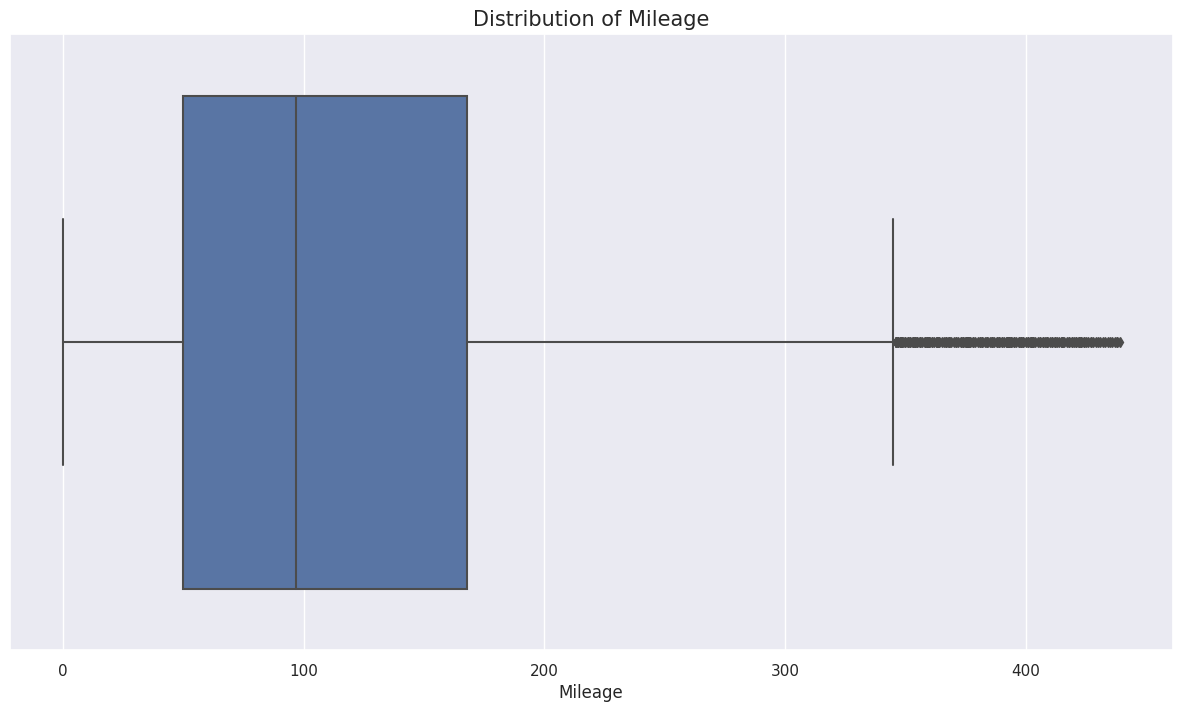

In [ ]:
#See outliers in mileage?
#lets see the distribution of the kilometers driven
plt.figure(figsize=(15,8))
sns.boxplot(x = usedcarworks_df["Mileage"])
plt.title("Distribution of Mileage", fontsize=15)
plt.show()

In [ ]:
#From the graph above we see cars that are have Mileage well over 300 km per unit
#see a list of the highest Mileage cars and see if its possible

mileage200plus = usedcarworks_df.loc[usedcarworks_df['Mileage']>200].sort_values(by=['Mileage'], ascending = False)

In [ ]:
mileage200plus

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage
6855,Renault Koleos 4X2 MT,Hyderabad,92448,Manual,First,1995 CC,147.9 bhp,5.00,15.05,NaN,Renault,6,0,1,0,0,0,439
6834,Hyundai Elantra SX AT,Coimbatore,25132,Automatic,First,1797 CC,147.4 bhp,5.00,21.77,NaN,Hyundai,3,0,0,0,0,1,438
7122,Hyundai Elantra SX AT,Bangalore,25000,Automatic,Second,1797 CC,147.4 bhp,5.00,21.77,NaN,Hyundai,4,0,0,0,0,1,438
6515,BMW 5 Series 530i Sport Line,Kolkata,30342,Automatic,First,1998 CC,252 bhp,5.00,59.12,NaN,BMW,9,0,0,0,0,1,437
6470,Isuzu MU 7 4x2 HIPACK,Kolkata,45000,Manual,First,2999 CC,161 bhp,7.00,33.68,NaN,Isuzu,4,0,1,0,0,0,436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,Skoda Superb 1.8 TSI,Pune,35102,Automatic,First,1798 CC,161.6 bhp,5.00,33.36,5.50,Skoda,10,0,0,0,0,1,201
6703,Mercedes-Benz E-Class E 220 d,Delhi,15000,Automatic,First,1950 CC,191.34 bhp,5.00,86.97,NaN,Mercedes-Benz,3,0,0,0,0,1,201
1113,Mercedes-Benz E-Class E 220 d,Kochi,20446,Automatic,First,1950 CC,191.34 bhp,5.00,86.97,51.35,Mercedes-Benz,2,0,0,0,0,1,201
3020,Hyundai Tucson CRDi,Delhi,80000,Manual,Second,1991 CC,112 bhp,7.00,27.82,1.75,Hyundai,14,0,1,0,0,0,201


We see Mileage in the high realms of 439 the first one being a Renault Koleos 4x2 MT.


### **Engine**

The Engine column contains a unit embedded with a nymber.

In [ ]:
usedcarworks_df['Engine']

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
7248    1598 CC
7249    1197 CC
7250    1461 CC
7251    1197 CC
7252    2148 CC
Name: Engine, Length: 7252, dtype: object

In [ ]:
#how many 'Engine' rows are NaN
usedcarworks_df['Engine'].isna().value_counts()

False    7206
True       46
Name: Engine, dtype: int64

In [ ]:
#find all Engines that are nan
usedcarworks_df.loc[usedcarworks_df['Engine'].isna()]

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage
194,Honda City 1.5 GXI,Ahmedabad,60006,Manual,First,NaN,NaN,NaN,13.58,2.95,Honda,13,0,0,0,0,1,14
208,Maruti Swift 1.3 VXi,Kolkata,42001,Manual,First,NaN,NaN,NaN,7.88,2.11,Maruti,10,0,0,0,0,1,133
733,Maruti Swift 1.3 VXi,Chennai,97800,Manual,Third,NaN,NaN,NaN,7.88,1.75,Maruti,14,0,0,0,0,1,133
749,Land Rover Range Rover 3.0 D,Mumbai,55001,Automatic,Second,NaN,NaN,NaN,120.00,26.50,Land Rover,12,0,1,0,0,0,14
1294,Honda City 1.3 DX,Delhi,55005,Manual,First,NaN,NaN,NaN,13.58,3.20,Honda,11,0,0,0,0,1,27
1327,Maruti Swift 1.3 ZXI,Hyderabad,50295,Manual,First,NaN,NaN,NaN,7.88,5.80,Maruti,5,0,0,0,0,1,133
1385,Honda City 1.5 GXI,Pune,115000,Manual,Second,NaN,NaN,NaN,13.58,1.50,Honda,16,0,0,0,0,1,14
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,69078,Manual,First,NaN,NaN,NaN,120.00,40.88,Land Rover,12,0,0,0,0,1,14
2074,Maruti Swift 1.3 LXI,Pune,24255,Manual,First,NaN,NaN,NaN,7.88,3.15,Maruti,9,0,0,0,0,1,133
2096,Hyundai Santro LP zipPlus,Coimbatore,52146,Manual,First,NaN,NaN,NaN,4.55,1.93,Hyundai,16,0,0,0,0,1,14


Notice that if Engine is nan, so is Power and number of seats.
we may be able to obtain the mileage from the Name of the car.

In [ ]:
#how many types of engines
carengine= usedcarworks_df['Engine'].str.split(" ", n=1, expand=True)
carengine[1].value_counts()

CC    7206
Name: 1, dtype: int64

All engines are CC. So it make sense to assume that all engines are CC.

In [ ]:
#Engine contains text "CC" next to the actual engine block size, drop CC
def engine_to_num(Engine):
    """This function takes in a string representing an engine size in CC
    and converts it to a number. For example, '1000CC' becomes 1000.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(Engine, str):  # checks if `income_val` is a string
      return float(Engine.replace('CC', ''))
    else:  # this happens when the current income is np.nan
        return np.nan

col_transforms = {
    'Engine': engine_to_num
}

for k,v in col_transforms.items():
  usedcarworks_df[k] = usedcarworks_df[k].map(v)



In [ ]:
usedcarworks_df.head(10)

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage
0,Maruti Wagon R LXI CNG,Mumbai,72000,Manual,First,998.00,58.16 bhp,5.00,5.51,1.75,Maruti,10,1,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Manual,First,1582.00,126.2 bhp,5.00,16.06,12.50,Hyundai,5,0,1,0,0,0,1
2,Honda Jazz V,Chennai,46000,Manual,First,1199.00,88.7 bhp,5.00,8.61,4.50,Honda,9,0,0,0,0,1,2
3,Maruti Ertiga VDI,Chennai,87000,Manual,First,1248.00,88.76 bhp,7.00,11.27,6.00,Maruti,8,0,1,0,0,0,3
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Automatic,Second,1968.00,140.8 bhp,5.00,53.14,17.74,Audi,7,0,1,0,0,0,4
5,Hyundai EON LPG Era Plus Option,Hyderabad,75000,Manual,First,814.00,55.2 bhp,5.00,10.25,2.35,Hyundai,8,0,0,0,1,0,5
6,Nissan Micra Diesel XV,Jaipur,86999,Manual,First,1461.00,63.1 bhp,5.00,9.47,3.50,Nissan,7,0,1,0,0,0,6
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,36000,Automatic,First,2755.00,171.5 bhp,8.00,21.00,17.50,Toyota,4,0,1,0,0,0,7
8,Volkswagen Vento Diesel Comfortline,Pune,64430,Manual,First,1598.00,103.6 bhp,5.00,13.23,5.20,Volkswagen,7,0,1,0,0,0,8
9,Tata Indica Vista Quadrajet LS,Chennai,65932,Manual,Second,1248.00,74 bhp,5.00,7.63,1.95,Tata,8,0,1,0,0,0,9


We still must do something about the Engine nan.

Notice that some car names contain the engine size


In [ ]:
#Extract the engine size from the Name of the car
engineName_df= pd.DataFrame(usedcarworks_df.loc[usedcarworks_df['Engine'].isna()])
engineName_df['hasEngineinName'] = usedcarworks_df['Name'].str.extract('(\d.\d)', expand=True)
engineName_df

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage,hasEngineinName
194,Honda City 1.5 GXI,Ahmedabad,60006,Manual,First,NaN,NaN,NaN,13.58,2.95,Honda,13,0,0,0,0,1,14,1.5
208,Maruti Swift 1.3 VXi,Kolkata,42001,Manual,First,NaN,NaN,NaN,7.88,2.11,Maruti,10,0,0,0,0,1,133,1.3
733,Maruti Swift 1.3 VXi,Chennai,97800,Manual,Third,NaN,NaN,NaN,7.88,1.75,Maruti,14,0,0,0,0,1,133,1.3
749,Land Rover Range Rover 3.0 D,Mumbai,55001,Automatic,Second,NaN,NaN,NaN,120.00,26.50,Land Rover,12,0,1,0,0,0,14,3.0
1294,Honda City 1.3 DX,Delhi,55005,Manual,First,NaN,NaN,NaN,13.58,3.20,Honda,11,0,0,0,0,1,27,1.3
1327,Maruti Swift 1.3 ZXI,Hyderabad,50295,Manual,First,NaN,NaN,NaN,7.88,5.80,Maruti,5,0,0,0,0,1,133,1.3
1385,Honda City 1.5 GXI,Pune,115000,Manual,Second,NaN,NaN,NaN,13.58,1.50,Honda,16,0,0,0,0,1,14,1.5
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,69078,Manual,First,NaN,NaN,NaN,120.00,40.88,Land Rover,12,0,0,0,0,1,14,200
2074,Maruti Swift 1.3 LXI,Pune,24255,Manual,First,NaN,NaN,NaN,7.88,3.15,Maruti,9,0,0,0,0,1,133,1.3
2096,Hyundai Santro LP zipPlus,Coimbatore,52146,Manual,First,NaN,NaN,NaN,4.55,1.93,Hyundai,16,0,0,0,0,1,14,NaN


In [ ]:
#Only keep values that are smaller than a safe value for engine size like 10. So an extracted value like 300 is not Engine size, so ignore it.
engineName_df.loc[engineName_df['hasEngineinName'].astype(float) < 10,'EngineSize'] = 'True'
engineName_df


,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage,hasEngineinName,EngineSize
194,Honda City 1.5 GXI,Ahmedabad,60006,Manual,First,NaN,NaN,NaN,13.58,2.95,Honda,13,0,0,0,0,1,14,1.5,True
208,Maruti Swift 1.3 VXi,Kolkata,42001,Manual,First,NaN,NaN,NaN,7.88,2.11,Maruti,10,0,0,0,0,1,133,1.3,True
733,Maruti Swift 1.3 VXi,Chennai,97800,Manual,Third,NaN,NaN,NaN,7.88,1.75,Maruti,14,0,0,0,0,1,133,1.3,True
749,Land Rover Range Rover 3.0 D,Mumbai,55001,Automatic,Second,NaN,NaN,NaN,120.00,26.50,Land Rover,12,0,1,0,0,0,14,3.0,True
1294,Honda City 1.3 DX,Delhi,55005,Manual,First,NaN,NaN,NaN,13.58,3.20,Honda,11,0,0,0,0,1,27,1.3,True
1327,Maruti Swift 1.3 ZXI,Hyderabad,50295,Manual,First,NaN,NaN,NaN,7.88,5.80,Maruti,5,0,0,0,0,1,133,1.3,True
1385,Honda City 1.5 GXI,Pune,115000,Manual,Second,NaN,NaN,NaN,13.58,1.50,Honda,16,0,0,0,0,1,14,1.5,True
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,69078,Manual,First,NaN,NaN,NaN,120.00,40.88,Land Rover,12,0,0,0,0,1,14,200,NaN
2074,Maruti Swift 1.3 LXI,Pune,24255,Manual,First,NaN,NaN,NaN,7.88,3.15,Maruti,9,0,0,0,0,1,133,1.3,True
2096,Hyundai Santro LP zipPlus,Coimbatore,52146,Manual,First,NaN,NaN,NaN,4.55,1.93,Hyundai,16,0,0,0,0,1,14,NaN,NaN


In [ ]:
#Add a temporary field True if the enginesize is valid
engineName_df.loc[engineName_df['EngineSize'] == "True",'Engine'] = engineName_df['hasEngineinName'].astype(float)*1000
engineName_df

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage,hasEngineinName,EngineSize
194,Honda City 1.5 GXI,Ahmedabad,60006,Manual,First,1500.00,NaN,NaN,13.58,2.95,Honda,13,0,0,0,0,1,14,1.5,True
208,Maruti Swift 1.3 VXi,Kolkata,42001,Manual,First,1300.00,NaN,NaN,7.88,2.11,Maruti,10,0,0,0,0,1,133,1.3,True
733,Maruti Swift 1.3 VXi,Chennai,97800,Manual,Third,1300.00,NaN,NaN,7.88,1.75,Maruti,14,0,0,0,0,1,133,1.3,True
749,Land Rover Range Rover 3.0 D,Mumbai,55001,Automatic,Second,3000.00,NaN,NaN,120.00,26.50,Land Rover,12,0,1,0,0,0,14,3.0,True
1294,Honda City 1.3 DX,Delhi,55005,Manual,First,1300.00,NaN,NaN,13.58,3.20,Honda,11,0,0,0,0,1,27,1.3,True
1327,Maruti Swift 1.3 ZXI,Hyderabad,50295,Manual,First,1300.00,NaN,NaN,7.88,5.80,Maruti,5,0,0,0,0,1,133,1.3,True
1385,Honda City 1.5 GXI,Pune,115000,Manual,Second,1500.00,NaN,NaN,13.58,1.50,Honda,16,0,0,0,0,1,14,1.5,True
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,69078,Manual,First,NaN,NaN,NaN,120.00,40.88,Land Rover,12,0,0,0,0,1,14,200,NaN
2074,Maruti Swift 1.3 LXI,Pune,24255,Manual,First,1300.00,NaN,NaN,7.88,3.15,Maruti,9,0,0,0,0,1,133,1.3,True
2096,Hyundai Santro LP zipPlus,Coimbatore,52146,Manual,First,NaN,NaN,NaN,4.55,1.93,Hyundai,16,0,0,0,0,1,14,NaN,NaN


In [ ]:
#drop unneeded columns, that is those that don't have a temporary value of True
engineName_df.drop(['EngineSize','hasEngineinName'], axis=1, inplace=True)

In [ ]:
engineName_df.loc[engineName_df['Engine'].isna()]

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,69078,Manual,First,NaN,NaN,NaN,120.00,40.88,Land Rover,12,0,0,0,0,1,14
2096,Hyundai Santro LP zipPlus,Coimbatore,52146,Manual,First,NaN,NaN,NaN,4.55,1.93,Hyundai,16,0,0,0,0,1,14
2264,Toyota Etios Liva V,Pune,24500,Manual,Second,NaN,NaN,NaN,8.53,2.95,Toyota,8,0,0,0,0,1,249
2530,BMW 5 Series 520d Sedan,Kochi,64158,Automatic,First,NaN,NaN,NaN,67.87,17.89,BMW,6,0,1,0,0,0,163
2542,Hyundai Santro GLS II - Euro II,Bangalore,65000,Manual,Second,NaN,NaN,NaN,4.55,3.15,Hyundai,9,0,0,0,0,1,14
2623,BMW 5 Series 520d Sedan,Pune,95000,Automatic,Second,NaN,NaN,NaN,67.87,18.00,BMW,8,0,1,0,0,0,163
2737,Maruti Wagon R Vx,Jaipur,200000,Manual,First,NaN,NaN,NaN,5.51,0.70,Maruti,19,0,0,0,0,1,188
2780,Hyundai Santro GLS II - Euro II,Pune,100000,Manual,First,NaN,NaN,NaN,4.55,1.60,Hyundai,11,0,0,0,0,1,14
2842,Hyundai Santro GLS II - Euro II,Bangalore,43000,Manual,First,NaN,NaN,NaN,4.55,3.25,Hyundai,8,0,0,0,0,1,14
3272,BMW 5 Series 520d Sedan,Mumbai,81000,Automatic,Second,NaN,NaN,NaN,67.87,10.50,BMW,12,0,1,0,0,0,163


Now lets deal with special cases

Case: BMW 5 Series 520d Sedan 1995cc 188bhp

In [ ]:
carname = "BMW 5 Series 520d Sedan"
engsize = 1995
enginebhp=188
engineName_df.loc[engineName_df['Name'] == carname,'Engine'] = engsize
engineName_df.loc[engineName_df['Name'] == carname,'Power'] = enginebhp

Case LandRover Range Rover Sport 2005-2012
engine size: 4.4L V8 296 hp

In [ ]:
carname = "Land Rover Range Rover Sport 2005 2012 Sport"
engsize= 4400
enginebhp=296
engineName_df.loc[engineName_df['Name'] == carname,'Engine'] = engsize
engineName_df.loc[engineName_df['Name'] == carname,'Power'] = enginebhp

Case: Toyota Etios Liva V, 1197cc, 79bhp

In [ ]:
carname='Toyota Etios Liva V'
enginesize=1197
enginebhp=79
engineName_df.loc[engineName_df['Name'] == carname,'Engine'] = engsize
engineName_df.loc[engineName_df['Name'] == carname,'Power'] = enginebhp

Case Hyundai Santro GLS II - Euro II
999 cc, 62bhp

In [ ]:
carname='Hyundai Santro GLS II - Euro II'
enginesize=999
enginebhp=62
engineName_df.loc[engineName_df['Name'] == carname,'Engine'] = engsize
engineName_df.loc[engineName_df['Name'] == carname,'Power'] = enginebhp

Case Hyundai Santro LP zipPlus 999 cc, 62bhp


In [ ]:
carname ='Hyundai Santro LP zipPlus'
enginesize=999
enginebhp=62
engineName_df.loc[engineName_df['Name'] == carname,'Engine'] = engsize
engineName_df.loc[engineName_df['Name'] == carname,'Power'] = enginebhp

Case Maruti Wagon R Vx 998cc, 65.71bhp

In [ ]:
carname = 'Maruti Wagon R Vx'
enginesize=998
enginebhp=65.71
engineName_df.loc[engineName_df['Name'] == carname,'Engine'] = engsize
engineName_df.loc[engineName_df['Name'] == carname,'Power'] = enginebhp

Case Honda CR-V AT With Sun Roof 2400cc, 185bhp

In [ ]:
carname= 'Honda CR-V AT With Sun Roof'
enginesize=2400
enginebhp=185
engineName_df.loc[engineName_df['Name'] == carname,'Engine'] = engsize
engineName_df.loc[engineName_df['Name'] == carname,'Power'] = enginebhp

Case Hyundai Santro Xing XG 1086cc, 63Bhp

In [ ]:
carname= 'Hyundai Santro Xing XG'
enginesize=1086
enginebhp=63
engineName_df.loc[engineName_df['Name'] == carname,'Engine'] = engsize
engineName_df.loc[engineName_df['Name'] == carname,'Power'] = enginebhp

Case Honda Jazz Select Edition 1198cc, 89bhp

In [ ]:
carname='Honda Jazz Select Edition'
enginesize=1198
enginebhp=89
engineName_df.loc[engineName_df['Name'] == carname,'Engine'] = engsize
engineName_df.loc[engineName_df['Name'] == carname,'Power'] = enginebhp

Case Toyota Etios Liva Diesel TRD Sportivo 1364cc, 67bhp

In [ ]:
carname= 'Toyota Etios Liva Diesel TRD Sportivo'
enginesize=1364
enginebhp=67
engineName_df.loc[engineName_df['Name'] == carname,'Engine'] = engsize
engineName_df.loc[engineName_df['Name'] == carname,'Power'] = enginebhp

Case Mahindra TUV 300 P4 1279cc, 120bhp

In [ ]:
carname='Mahindra TUV 300 P4'
enginesize=1279
enginebhp=120
engineName_df.loc[engineName_df['Name'] == carname,'Engine'] = engsize
engineName_df.loc[engineName_df['Name'] == carname,'Power'] = enginebhp

In [ ]:
#Visualize the dataframe after changes
engineName_df

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage
194,Honda City 1.5 GXI,Ahmedabad,60006,Manual,First,1500.00,NaN,NaN,13.58,2.95,Honda,13,0,0,0,0,1,14
208,Maruti Swift 1.3 VXi,Kolkata,42001,Manual,First,1300.00,NaN,NaN,7.88,2.11,Maruti,10,0,0,0,0,1,133
733,Maruti Swift 1.3 VXi,Chennai,97800,Manual,Third,1300.00,NaN,NaN,7.88,1.75,Maruti,14,0,0,0,0,1,133
749,Land Rover Range Rover 3.0 D,Mumbai,55001,Automatic,Second,3000.00,NaN,NaN,120.00,26.50,Land Rover,12,0,1,0,0,0,14
1294,Honda City 1.3 DX,Delhi,55005,Manual,First,1300.00,NaN,NaN,13.58,3.20,Honda,11,0,0,0,0,1,27
1327,Maruti Swift 1.3 ZXI,Hyderabad,50295,Manual,First,1300.00,NaN,NaN,7.88,5.80,Maruti,5,0,0,0,0,1,133
1385,Honda City 1.5 GXI,Pune,115000,Manual,Second,1500.00,NaN,NaN,13.58,1.50,Honda,16,0,0,0,0,1,14
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,69078,Manual,First,4400.00,296,NaN,120.00,40.88,Land Rover,12,0,0,0,0,1,14
2074,Maruti Swift 1.3 LXI,Pune,24255,Manual,First,1300.00,NaN,NaN,7.88,3.15,Maruti,9,0,0,0,0,1,133
2096,Hyundai Santro LP zipPlus,Coimbatore,52146,Manual,First,4400.00,62,NaN,4.55,1.93,Hyundai,16,0,0,0,0,1,14


In [ ]:
#lets drop the nan entries
usedcarworks_df = usedcarworks_df.dropna(subset=['Engine'])
usedcarworks_df

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage
0,Maruti Wagon R LXI CNG,Mumbai,72000,Manual,First,998.00,58.16 bhp,5.00,5.51,1.75,Maruti,10,1,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Manual,First,1582.00,126.2 bhp,5.00,16.06,12.50,Hyundai,5,0,1,0,0,0,1
2,Honda Jazz V,Chennai,46000,Manual,First,1199.00,88.7 bhp,5.00,8.61,4.50,Honda,9,0,0,0,0,1,2
3,Maruti Ertiga VDI,Chennai,87000,Manual,First,1248.00,88.76 bhp,7.00,11.27,6.00,Maruti,8,0,1,0,0,0,3
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Automatic,Second,1968.00,140.8 bhp,5.00,53.14,17.74,Audi,7,0,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,89411,Manual,First,1598.00,103.6 bhp,5.00,13.23,NaN,Volkswagen,9,0,1,0,0,0,8
7249,Volkswagen Polo GT TSI,Mumbai,59000,Automatic,First,1197.00,103.6 bhp,5.00,10.15,NaN,Volkswagen,5,0,0,0,0,1,224
7250,Nissan Micra Diesel XV,Kolkata,28000,Manual,First,1461.00,63.1 bhp,5.00,9.47,NaN,Nissan,8,0,1,0,0,0,6
7251,Volkswagen Polo GT TSI,Pune,52262,Automatic,Third,1197.00,103.6 bhp,5.00,10.15,NaN,Volkswagen,7,0,0,0,0,1,107


In [ ]:
#add dataframes

usedcarworks_df = usedcarworks_df.append(engineName_df)
usedcarworks_df

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage
0,Maruti Wagon R LXI CNG,Mumbai,72000,Manual,First,998.00,58.16 bhp,5.00,5.51,1.75,Maruti,10,1,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Manual,First,1582.00,126.2 bhp,5.00,16.06,12.50,Hyundai,5,0,1,0,0,0,1
2,Honda Jazz V,Chennai,46000,Manual,First,1199.00,88.7 bhp,5.00,8.61,4.50,Honda,9,0,0,0,0,1,2
3,Maruti Ertiga VDI,Chennai,87000,Manual,First,1248.00,88.76 bhp,7.00,11.27,6.00,Maruti,8,0,1,0,0,0,3
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Automatic,Second,1968.00,140.8 bhp,5.00,53.14,17.74,Audi,7,0,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6651,Maruti Swift 1.3 VXi,Kolkata,36009,Manual,First,1300.00,NaN,NaN,7.88,NaN,Maruti,5,0,0,0,0,1,133
6677,Fiat Punto 1.4 Emotion,Jaipur,65000,Manual,Third,1400.00,NaN,NaN,8.60,NaN,Fiat,10,0,0,0,0,1,209
6685,Maruti Swift 1.3 VXi,Pune,115000,Manual,Second,1300.00,NaN,NaN,7.88,NaN,Maruti,10,0,0,0,0,1,133
6880,BMW 5 Series 520d Sedan,Chennai,95000,Automatic,Second,1995.00,188,NaN,67.87,NaN,BMW,11,0,1,0,0,0,163


In [ ]:
usedcarworks_df["Engine"].isna().value_counts()

False    7252
Name: Engine, dtype: int64

No more nan values for Engine

In [ ]:
# sorting by amount of missing values
usedcarworks_df.isnull().sum().sort_values(ascending=False)

Price                 1234
Power                  153
Seats                   53
Brand                    0
Fuel_Type_Petrol         0
Fuel_Type_LPG            0
Fuel_Type_Electric       0
Fuel_Type_Diesel         0
Fuel_Type_CNG            0
Age                      0
Name                     0
Location                 0
New_Price                0
Engine                   0
Owner_Type               0
Transmission             0
Kilometers_Driven        0
Mileage                  0
dtype: int64

A review shows that Price, Power, and Seats have missing values.

**Power**

In [ ]:
#quick view of Power
usedcarworks_df['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6651          NaN
6677          NaN
6685          NaN
6880          188
6902           79
Name: Power, Length: 7252, dtype: object

In [ ]:
#how many 'Power' rows are NaN
usedcarworks_df['Power'].isna().value_counts()

False    7099
True      153
Name: Power, dtype: int64

In [ ]:
#find all Power that are nan
usedcarworks_df.loc[usedcarworks_df['Power'].isna()]

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,111111,Manual,First,1399.00,NaN,5.00,11.69,2.00,Ford,12,0,1,0,0,0,49
79,Hyundai Santro Xing XL,Hyderabad,87591,Manual,First,1086.00,NaN,5.00,4.55,1.30,Hyundai,15,0,0,0,0,1,14
89,Hyundai Santro Xing XO,Hyderabad,73745,Manual,First,1086.00,NaN,5.00,4.55,2.10,Hyundai,13,0,0,0,0,1,72
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,102000,Manual,Second,1086.00,NaN,5.00,4.55,0.85,Hyundai,15,0,0,0,0,1,72
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,80759,Manual,Third,1086.00,NaN,5.00,4.55,1.67,Hyundai,12,0,0,0,0,1,72
227,Maruti Swift VDI BSIV,Delhi,47000,Manual,First,1248.00,NaN,5.00,7.88,4.10,Maruti,7,0,1,0,0,0,49
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,72000,Manual,Third,1086.00,NaN,5.00,4.55,0.95,Hyundai,13,0,0,0,0,1,72
262,Hyundai Santro Xing XL,Hyderabad,99000,Manual,First,1086.00,NaN,5.00,4.55,1.75,Hyundai,14,0,0,0,0,1,14
307,Hyundai Santro Xing XL,Chennai,58000,Manual,Second,1086.00,NaN,5.00,4.55,1.50,Hyundai,14,0,0,0,0,1,14
308,Maruti Swift VDI BSIV,Kolkata,60020,Manual,First,1248.00,NaN,5.00,7.88,2.50,Maruti,9,0,1,0,0,0,49


There are lots of nans in Power

In [ ]:
#create a dataframe for power nan
powernull_df= pd.DataFrame(usedcarworks_df.loc[usedcarworks_df['Power'].isna()])
powernull_df

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,111111,Manual,First,1399.00,NaN,5.00,11.69,2.00,Ford,12,0,1,0,0,0,49
79,Hyundai Santro Xing XL,Hyderabad,87591,Manual,First,1086.00,NaN,5.00,4.55,1.30,Hyundai,15,0,0,0,0,1,14
89,Hyundai Santro Xing XO,Hyderabad,73745,Manual,First,1086.00,NaN,5.00,4.55,2.10,Hyundai,13,0,0,0,0,1,72
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,102000,Manual,Second,1086.00,NaN,5.00,4.55,0.85,Hyundai,15,0,0,0,0,1,72
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,80759,Manual,Third,1086.00,NaN,5.00,4.55,1.67,Hyundai,12,0,0,0,0,1,72
227,Maruti Swift VDI BSIV,Delhi,47000,Manual,First,1248.00,NaN,5.00,7.88,4.10,Maruti,7,0,1,0,0,0,49
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,72000,Manual,Third,1086.00,NaN,5.00,4.55,0.95,Hyundai,13,0,0,0,0,1,72
262,Hyundai Santro Xing XL,Hyderabad,99000,Manual,First,1086.00,NaN,5.00,4.55,1.75,Hyundai,14,0,0,0,0,1,14
307,Hyundai Santro Xing XL,Chennai,58000,Manual,Second,1086.00,NaN,5.00,4.55,1.50,Hyundai,14,0,0,0,0,1,14
308,Maruti Swift VDI BSIV,Kolkata,60020,Manual,First,1248.00,NaN,5.00,7.88,2.50,Maruti,9,0,1,0,0,0,49


Some of the cars we already know from before.

Lets take a look at them and solve them one by one.

Visit site: www.carwale.com

In [ ]:
powernull_df['Name'].value_counts()

Maruti Swift VDI BSIV                      12
Toyota Etios GD                             8
Maruti Swift 1.3 VXi                        8
Toyota Etios Liva GD                        8
Hyundai Santro Xing XL eRLX Euro III        7
Hyundai Santro Xing XL                      7
Maruti Swift VDI BSIV W ABS                 6
Hyundai Santro Xing XO                      5
Hyundai Santro Xing XO eRLX Euro II         5
Hyundai Santro Xing XP                      5
Toyota Etios Liva G                         4
Ford Fiesta 1.4 SXi TDCi                    4
Tata Indica DLS                             4
Hyundai Santro GLS I - Euro II              3
Nissan Teana 230jM                          3
Honda City 1.5 GXI                          3
Maruti Estilo LXI                           3
Hyundai Santro LS zipPlus                   2
Maruti Swift 1.3 LXI                        2
Maruti Esteem Vxi                           2
Land Rover Range Rover 3.0 D                2
Fiat Punto 1.4 Emotion            

Lets try Case by Case

In [ ]:
#case All Maruti Swift VDI BSIV"
carname = "Maruti Swift"
enginesize = 1300
power = 87

#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case All Toyota Etios
carname = "Toyota Etios"
enginesize = 1364
power = 67.05

#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Hyundai Santro Xing XL eRLX Euro III, Hyundai Santro Xing XL , Hyundai Santro Xing XO, etc (All Santros)
carname= "Hyundai Santro"
enginesize = 1086
power = 63

#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Ford Fiesta 1.4 SXi TDCi
carname = "Ford Fiesta 1.4"
enginesize = 1400
power = 68

#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Tata Indica DLS
carname = "Tata Indica DLS"
enginesize = 1405
power = 62

#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Nissan Teana 230jM
carname = "Nissan Teana 230jM"
enginesize = 2349
power = 170
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Toyota Qualis Fleet A3
carname = "Toyota Qualis Fleet A3"
enginesize = 2466
power = 154
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Fiat Punto 1.2 Dynamic
carname = "Fiat Punto 1.2 Dynamic"
power = 67
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Fiat Punto 1.3 Emotion
carname = "Fiat Punto 1.3 Emotion"
power = 91.7
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#caSE Fiat Siena 1.2 ELX
carname = "Fiat Siena 1.2 ELX"
power = 99
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Skoda Laura 1.8
carname = "Skoda Laura 1.8"
power = 157.8
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Land Rover Range Rover 3.0 D
carname = "Land Rover Range Rover 3.0 D"
power = 345.98
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Nissan Micra Diesel
carname = "Nissan Micra Diesel"
power = 65
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Mercedes-Benz E-Class 220 CDI
carname = "Mercedes-Benz E-Class 220 CDI"
power = 191.7
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Mahindra Jeep MM 540 DP
carname = "Mahindra Jeep MM 540 DP"
power = 62
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Porsche Cayman 2009-2012 S tiptronic
carname =  "Porsche Cayman 2009-2012 S tiptronic"
power = 315
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Maruti Baleno LXI - BSIII
carname = "Maruti Baleno"
power = 83.1
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Volkswagen Jetta 2007-2011 1.9 L TDI
carname = "Volkswagen Jetta 2007-2011 1.9 L TDI"
power=104
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Honda CR-V Sport
carname = "Honda CR-V Sport"
power = 145
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Smart Fortwo CDI AT
carname = "Smart Fortwo"
power= 53
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Chevrolet Optra 1.6 Elite
carname = "Chevrolet Optra 1.6"
power= 157.8
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power



In [ ]:
#case Ford Endeavour Hurricane LE
carname = "Ford Endeavour"
power= 156
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power




In [ ]:
#case Toyota Qualis RS E2
carname = "Toyota Qualis"
power= 71.02
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Audi A4 3.2 FSI Tiptronic Quattro
carname = "Audi A4 3.2"
power= 252
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Hyundai i20 new Sportz AT 1.4
carname = "Hyundai i20"
power= 88.73
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Honda City 1.5
carname = "Honda City 1.5"
power= 100
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Honda City 1.3
carname = "Honda City 1.3"
power= 84
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Fiat Punto 1.4 Emotion
carname = "Fiat Punto 1.4 Emotion"
power= 88.8
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Porsche Cayman 2009-2012 S
carname = "Porsche Cayman 2009-2012 S"
power= 320
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Mahindra Bolero
carname = "Mahindra Bolero"
power= 70
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Maruti Estilo
carname = "Maruti Estilo"
power= 64
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Tata Indica
carname = "Tata Indica"
power= 64.4
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Maruti Esteem
carname = "Maruti Esteem"
power= 122
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Maruti 1000 AC
carname = "Maruti 1000"
power= 46
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Hindustan Motors Contessa 2.0 DSL
carname = "Hindustan Motors Contessa"
power= 52
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Ford Fiesta 1.6 SXI ABS Duratec
carname = "Ford Fiesta 1.6 SXI ABS Duratec"
power= 99.6
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Fiat Petra 1.2 EL
carname = "Fiat Petra 1.2 EL"
power= 72
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Mahindra Jeep MM 550 PE
carname = "Mahindra Jeep MM 550 PE"
power= 105
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
#case Skoda Laura Classic 1.8 TSI
carname = "Skoda Laura Classic 1.8 TSI"
power= 157.8
#replace by power
powernull_df.loc[powernull_df['Name'].str.contains(carname),'Power'] = power

In [ ]:
powernull_df

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,111111,Manual,First,1399.00,68,5.00,11.69,2.00,Ford,12,0,1,0,0,0,49
79,Hyundai Santro Xing XL,Hyderabad,87591,Manual,First,1086.00,63,5.00,4.55,1.30,Hyundai,15,0,0,0,0,1,14
89,Hyundai Santro Xing XO,Hyderabad,73745,Manual,First,1086.00,63,5.00,4.55,2.10,Hyundai,13,0,0,0,0,1,72
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,102000,Manual,Second,1086.00,63,5.00,4.55,0.85,Hyundai,15,0,0,0,0,1,72
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,80759,Manual,Third,1086.00,63,5.00,4.55,1.67,Hyundai,12,0,0,0,0,1,72
227,Maruti Swift VDI BSIV,Delhi,47000,Manual,First,1248.00,87,5.00,7.88,4.10,Maruti,7,0,1,0,0,0,49
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,72000,Manual,Third,1086.00,63,5.00,4.55,0.95,Hyundai,13,0,0,0,0,1,72
262,Hyundai Santro Xing XL,Hyderabad,99000,Manual,First,1086.00,63,5.00,4.55,1.75,Hyundai,14,0,0,0,0,1,14
307,Hyundai Santro Xing XL,Chennai,58000,Manual,Second,1086.00,63,5.00,4.55,1.50,Hyundai,14,0,0,0,0,1,14
308,Maruti Swift VDI BSIV,Kolkata,60020,Manual,First,1248.00,87,5.00,7.88,2.50,Maruti,9,0,1,0,0,0,49


In [ ]:
#drop nan power
usedcarworks_df = usedcarworks_df.dropna(subset=['Power'])

In [ ]:
#save to original dataframe
usedcarworks_df = usedcarworks_df.append(powernull_df)
usedcarworks_df

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage
0,Maruti Wagon R LXI CNG,Mumbai,72000,Manual,First,998.00,58.16 bhp,5.00,5.51,1.75,Maruti,10,1,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Manual,First,1582.00,126.2 bhp,5.00,16.06,12.50,Hyundai,5,0,1,0,0,0,1
2,Honda Jazz V,Chennai,46000,Manual,First,1199.00,88.7 bhp,5.00,8.61,4.50,Honda,9,0,0,0,0,1,2
3,Maruti Ertiga VDI,Chennai,87000,Manual,First,1248.00,88.76 bhp,7.00,11.27,6.00,Maruti,8,0,1,0,0,0,3
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Automatic,Second,1968.00,140.8 bhp,5.00,53.14,17.74,Audi,7,0,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6042,Skoda Laura 1.8 TSI Ambition,Bangalore,72000,Manual,Second,1800.00,157.80,NaN,25.83,NaN,Skoda,11,0,0,0,0,1,26
6544,Hyundai i20 new Sportz AT 1.4,Bangalore,58000,Automatic,Second,1400.00,88.73,NaN,10.25,NaN,Hyundai,8,0,0,0,0,1,89
6651,Maruti Swift 1.3 VXi,Kolkata,36009,Manual,First,1300.00,87,NaN,7.88,NaN,Maruti,5,0,0,0,0,1,133
6677,Fiat Punto 1.4 Emotion,Jaipur,65000,Manual,Third,1400.00,88.80,NaN,8.60,NaN,Fiat,10,0,0,0,0,1,209


We don't have any more missing values for Power

In [ ]:
# sorting by amount of missing values
usedcarworks_df.isnull().sum().sort_values(ascending=False)

Price                 1234
Seats                   53
Brand                    0
Fuel_Type_Petrol         0
Fuel_Type_LPG            0
Fuel_Type_Electric       0
Fuel_Type_Diesel         0
Fuel_Type_CNG            0
Age                      0
Name                     0
Location                 0
New_Price                0
Power                    0
Engine                   0
Owner_Type               0
Transmission             0
Kilometers_Driven        0
Mileage                  0
dtype: int64

Summarizing we see lots of Price and Seats with empty values

**Seats**

In [ ]:
#lets see seats
usedcarworks_df['Seats']

0      5.00
1      5.00
2      5.00
3      7.00
4      5.00
       ... 
6042    NaN
6544    NaN
6651    NaN
6677    NaN
6685    NaN
Name: Seats, Length: 7252, dtype: float64

In [ ]:
#how many 'Seats' rows are NaN
usedcarworks_df['Seats'].isna().value_counts()

False    7199
True       53
Name: Seats, dtype: int64

In [ ]:
#from a general look, theese are mostly small passenger cars
#lets fill these values w/ the MODE
seatsmode= usedcarworks_df['Seats'].mode()
seatsmode

0   5.00
Name: Seats, dtype: float64

In [ ]:
#lets replace empty values with mode
usedcarworks_df['Seats'] = usedcarworks_df['Seats'].fillna(usedcarworks_df['Seats'].mode()[0])

In [ ]:
#lets check how many nan values are left for seats
usedcarworks_df.loc[usedcarworks_df['Seats'].isna()]

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage


No more nan seats.

**Transmission**

Transmision is important and affects the price of a car. We can make use dummy variables and drop the first column.

In [ ]:
#Transmission
#How many different type of Transmissions?
usedcarworks_df['Transmission'].value_counts()

Manual       5204
Automatic    2048
Name: Transmission, dtype: int64

In [ ]:
#make it dummies, drop the first column
usedcarworks_df = pd.get_dummies(usedcarworks_df, columns=['Transmission'], drop_first=True)

In [ ]:
usedcarworks_df

,Name,Location,Kilometers_Driven,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage,Transmission_Manual
0,Maruti Wagon R LXI CNG,Mumbai,72000,First,998.00,58.16 bhp,5.00,5.51,1.75,Maruti,10,1,0,0,0,0,0,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,First,1582.00,126.2 bhp,5.00,16.06,12.50,Hyundai,5,0,1,0,0,0,1,1
2,Honda Jazz V,Chennai,46000,First,1199.00,88.7 bhp,5.00,8.61,4.50,Honda,9,0,0,0,0,1,2,1
3,Maruti Ertiga VDI,Chennai,87000,First,1248.00,88.76 bhp,7.00,11.27,6.00,Maruti,8,0,1,0,0,0,3,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Second,1968.00,140.8 bhp,5.00,53.14,17.74,Audi,7,0,1,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6042,Skoda Laura 1.8 TSI Ambition,Bangalore,72000,Second,1800.00,157.80,5.00,25.83,NaN,Skoda,11,0,0,0,0,1,26,1
6544,Hyundai i20 new Sportz AT 1.4,Bangalore,58000,Second,1400.00,88.73,5.00,10.25,NaN,Hyundai,8,0,0,0,0,1,89,0
6651,Maruti Swift 1.3 VXi,Kolkata,36009,First,1300.00,87,5.00,7.88,NaN,Maruti,5,0,0,0,0,1,133,1
6677,Fiat Punto 1.4 Emotion,Jaipur,65000,Third,1400.00,88.80,5.00,8.60,NaN,Fiat,10,0,0,0,0,1,209,1


**Ownership**

In [ ]:
#Owner Type
#How many different type of owners
usedcarworks_df['Owner_Type'].value_counts()

First             5951
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [ ]:
#we make it dummies but don't drop any columns
usedcarworks_df = pd.get_dummies(usedcarworks_df, columns=['Owner_Type'])
usedcarworks_df

,Name,Location,Kilometers_Driven,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti Wagon R LXI CNG,Mumbai,72000,998.00,58.16 bhp,5.00,5.51,1.75,Maruti,10,1,0,0,0,0,0,1,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,1582.00,126.2 bhp,5.00,16.06,12.50,Hyundai,5,0,1,0,0,0,1,1,1,0,0,0
2,Honda Jazz V,Chennai,46000,1199.00,88.7 bhp,5.00,8.61,4.50,Honda,9,0,0,0,0,1,2,1,1,0,0,0
3,Maruti Ertiga VDI,Chennai,87000,1248.00,88.76 bhp,7.00,11.27,6.00,Maruti,8,0,1,0,0,0,3,1,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,1968.00,140.8 bhp,5.00,53.14,17.74,Audi,7,0,1,0,0,0,4,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6042,Skoda Laura 1.8 TSI Ambition,Bangalore,72000,1800.00,157.80,5.00,25.83,NaN,Skoda,11,0,0,0,0,1,26,1,0,0,1,0
6544,Hyundai i20 new Sportz AT 1.4,Bangalore,58000,1400.00,88.73,5.00,10.25,NaN,Hyundai,8,0,0,0,0,1,89,0,0,0,1,0
6651,Maruti Swift 1.3 VXi,Kolkata,36009,1300.00,87,5.00,7.88,NaN,Maruti,5,0,0,0,0,1,133,1,1,0,0,0
6677,Fiat Punto 1.4 Emotion,Jaipur,65000,1400.00,88.80,5.00,8.60,NaN,Fiat,10,0,0,0,0,1,209,1,0,0,0,1


**New Price**

There are no nan entries but the price of car seems very high.*italicized text*

In [ ]:
usedcarworks_df.sort_values(by=['New_Price'], ascending = False)

,Name,Location,Kilometers_Driven,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
6354,Bentley Flying Spur W12,Bangalore,31200,5998.00,616 bhp,5.00,375.00,NaN,Bentley,12,0,0,0,0,1,273,0,0,0,1,0
5521,Bentley Continental Flying Spur,Hyderabad,48000,5998.00,552 bhp,4.00,375.00,59.00,Bentley,14,0,0,0,0,1,278,0,1,0,0,0
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,25000,2993.00,255 bhp,5.00,230.00,160.00,Land Rover,3,0,1,0,0,0,377,0,1,0,0,0
4674,Mercedes-Benz S-Class 280 AT,Kochi,119859,2987.00,210 bhp,5.00,171.00,7.10,Mercedes-Benz,16,0,0,0,0,1,73,0,1,0,0,0
4245,Mercedes-Benz S-Class 320 L,Coimbatore,84143,2987.00,210 bhp,5.00,171.00,17.09,Mercedes-Benz,13,0,0,0,0,1,73,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,Renault KWID RXL,Kochi,24214,799.00,53.3 bhp,5.00,3.95,3.46,Renault,3,0,0,0,0,1,52,1,0,0,1,0
6804,Renault KWID RXL,Kochi,16292,799.00,53.3 bhp,5.00,3.95,NaN,Renault,2,0,0,0,0,1,52,1,1,0,0,0
4221,Maruti Alto K10 LXI,Kochi,51349,998.00,67.1 bhp,5.00,3.91,2.93,Maruti,6,0,0,0,0,1,96,1,1,0,0,0
6314,Maruti Alto K10 LXI,Kochi,42954,998.00,67.1 bhp,5.00,3.91,NaN,Maruti,3,0,0,0,0,1,96,1,1,0,0,0


We checked in https://www.cardekho.com/carmodels/Bentley/Bentley_Flying_Spur that the Bentley Continental Flying Spur sells somewhere in between 322 - 341.

The Land Rover Range Rover 3.0 Diesel LWB Vogue sells frrom 239 to 417

So we conclude that the data for Prices is OK.


**Price**

Price nan is an issue. Too many nan Prices

We have a few choices:

1. Drop all cars with Price nan
Easy to achieve. But is it advisable? How would it affect our dataset?

2. Complete cars w/o Price with mean
This is very difficult because there may be low end cars and high end cars.

3. Categorize cars w/o Price according to Year, Model
This may be complex.

In [ ]:
#sort null prices to visualize
pricenull_df= pd.DataFrame(usedcarworks_df.loc[usedcarworks_df['Price'].isna()])
pricenull_df.sort_values(by=['Name'],ascending=False)

,Name,Location,Kilometers_Driven,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
6384,Volvo XC90 2007-2015 D5 AWD,Bangalore,70000,2400.00,200 bhp,7.00,45.67,NaN,Volvo,4,0,1,0,0,0,303,1,1,0,0,0
6659,Volvo XC90 2007-2015 D5 AWD,Delhi,22230,2400.00,200 bhp,7.00,45.67,NaN,Volvo,6,0,1,0,0,0,303,1,1,0,0,0
6681,Volvo XC60 D4 SUMMUM,Ahmedabad,64000,1984.00,181 bhp,5.00,45.67,NaN,Volvo,7,0,1,0,0,0,129,0,1,0,0,0
6859,Volvo V40 Cross Country D3,Chennai,60000,1984.00,150 bhp,5.00,37.90,NaN,Volvo,5,0,1,0,0,0,86,0,1,0,0,0
6809,Volvo S80 D5,Delhi,87000,2400.00,215 bhp,5.00,45.67,NaN,Volvo,9,0,1,0,0,0,151,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7168,Audi A4 2.0 TDI,Bangalore,65475,1968.00,147.51 bhp,5.00,53.14,NaN,Audi,6,0,1,0,0,0,46,0,1,0,0,0
7238,Audi A4 2.0 TDI,Hyderabad,64000,1968.00,147.51 bhp,5.00,53.14,NaN,Audi,9,0,1,0,0,0,46,0,1,0,0,0
7233,Audi A4 2.0 TDI,Bangalore,21143,1968.00,147.51 bhp,5.00,53.14,NaN,Audi,6,0,1,0,0,0,46,0,1,0,0,0
6742,Audi A3 35 TDI Premium Plus,Hyderabad,52300,1968.00,143 bhp,5.00,42.89,NaN,Audi,5,0,1,0,0,0,187,0,1,0,0,0


In [ ]:
#lets sort by car name
pricenull_df['Name'].value_counts()

Maruti Alto LXi                           9
Honda City 1.5 V MT                       8
Maruti Swift Dzire VDI                    8
Volkswagen Polo 1.2 MPI Highline          8
Audi A6 2011-2015 2.0 TDI Premium Plus    7
                                         ..
Hyundai i20 Magna Optional 1.2            1
Nissan Micra XL CVT                       1
Hyundai i20 Sportz AT 1.4                 1
Hyundai Verna 1.4 CX                      1
Fiat Punto 1.4 Emotion                    1
Name: Name, Length: 768, dtype: int64

In [ ]:
#lets focus on the first car, the Maruti Alto Lxi with 9 nan Price entries
pricenull_df.loc[pricenull_df['Name']=='Maruti Alto LXi']

,Name,Location,Kilometers_Driven,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
6192,Maruti Alto LXi,Coimbatore,64631,796.00,46.3 bhp,5.00,4.36,NaN,Maruti,8,0,0,0,0,1,38,1,1,0,0,0
6280,Maruti Alto LXi,Jaipur,40000,796.00,46.3 bhp,5.00,4.36,NaN,Maruti,7,0,0,0,0,1,38,1,0,0,1,0
6684,Maruti Alto LXi,Chennai,60000,796.00,46.3 bhp,5.00,4.36,NaN,Maruti,9,0,0,0,0,1,38,1,1,0,0,0
6746,Maruti Alto LXi,Chennai,94385,796.00,46.3 bhp,5.00,4.36,NaN,Maruti,10,0,0,0,0,1,38,1,0,0,1,0
6803,Maruti Alto LXi,Jaipur,65000,796.00,46.3 bhp,5.00,4.36,NaN,Maruti,12,0,0,0,0,1,38,1,0,0,1,0
6838,Maruti Alto LXi,Jaipur,90000,796.00,46.3 bhp,5.00,4.36,NaN,Maruti,9,0,0,0,0,1,38,1,1,0,0,0
7137,Maruti Alto LXi,Kolkata,39008,796.00,46.3 bhp,5.00,4.36,NaN,Maruti,12,0,0,0,0,1,38,1,1,0,0,0
7165,Maruti Alto LXi,Hyderabad,62659,796.00,46.3 bhp,5.00,4.36,NaN,Maruti,11,0,0,0,0,1,38,1,1,0,0,0
7193,Maruti Alto LXi,Jaipur,75000,796.00,46.3 bhp,5.00,4.36,NaN,Maruti,14,0,0,0,0,1,38,1,1,0,0,0


From here we start seeing the complexity of trying to assign a price to these entries. Look they have different ages, owner type are not the same, odometer reading is different, and locations are different.

Would it make sense to approximate the price to other Maruti Alto LXi that have a Price value?


In [ ]:
#How many Maruti Alto LXi are in the dataset?
MarutiAltoLXi = usedcarworks_df.loc[usedcarworks_df['Name']=='Maruti Alto LXi'].value_counts()
MarutiAltoLXi

Name             Location    Kilometers_Driven  Engine  Power     Seats  New_Price  Price  Brand   Age  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Mileage  Transmission_Manual  Owner_Type_First  Owner_Type_Fourth & Above  Owner_Type_Second  Owner_Type_Third
Maruti Alto LXi  Ahmedabad   35000              796.00  46.3 bhp  5.00   4.36       1.50   Maruti  11   0              0                 0                   0              1                 38       1                    1                 0                          0                  0                   1
                 Hyderabad   76976              796.00  46.3 bhp  5.00   4.36       2.15   Maruti  9    0              0                 0                   0              1                 38       1                    0                 0                          1                  0                   1
                 Mumbai      66000              796.00  46.3 bhp  5.00   4.36       1.5

**1st Option: Drop Price nan**

In [ ]:
#1st attempt: Drop price null
usedcarworksprice_df = usedcarworks_df.dropna(subset=['Price'])
usedcarworksprice_df

,Name,Location,Kilometers_Driven,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti Wagon R LXI CNG,Mumbai,72000,998.00,58.16 bhp,5.00,5.51,1.75,Maruti,10,1,0,0,0,0,0,1,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,1582.00,126.2 bhp,5.00,16.06,12.50,Hyundai,5,0,1,0,0,0,1,1,1,0,0,0
2,Honda Jazz V,Chennai,46000,1199.00,88.7 bhp,5.00,8.61,4.50,Honda,9,0,0,0,0,1,2,1,1,0,0,0
3,Maruti Ertiga VDI,Chennai,87000,1248.00,88.76 bhp,7.00,11.27,6.00,Maruti,8,0,1,0,0,0,3,1,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,1968.00,140.8 bhp,5.00,53.14,17.74,Audi,7,0,1,0,0,0,4,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,Fiat Punto 1.2 Dynamic,Kochi,17941,1200.00,67,5.00,8.60,3.93,Fiat,3,0,0,0,0,1,328,1,1,0,0,0
4952,Fiat Punto 1.4 Emotion,Kolkata,47000,1400.00,88.80,5.00,8.60,1.49,Fiat,10,0,0,0,0,1,209,1,1,0,0,0
5015,Maruti Swift 1.3 VXi,Delhi,63000,1300.00,87,5.00,7.88,1.60,Maruti,14,0,0,0,0,1,133,1,1,0,0,0
5185,Maruti Swift 1.3 LXI,Delhi,52000,1300.00,87,5.00,7.88,3.65,Maruti,8,0,0,0,0,1,133,1,1,0,0,0


In [ ]:
# sorting by amount of missing values
usedcarworksprice_df.isnull().sum().sort_values(ascending=False)

Name                         0
Fuel_Type_Diesel             0
Owner_Type_Second            0
Owner_Type_Fourth & Above    0
Owner_Type_First             0
Transmission_Manual          0
Mileage                      0
Fuel_Type_Petrol             0
Fuel_Type_LPG                0
Fuel_Type_Electric           0
Fuel_Type_CNG                0
Location                     0
Age                          0
Brand                        0
Price                        0
New_Price                    0
Seats                        0
Power                        0
Engine                       0
Kilometers_Driven            0
Owner_Type_Third             0
dtype: int64

**2nd Option: Complete with mean values**


In [ ]:
#recall the following
pricenull_df['Name'].value_counts()

Maruti Alto LXi                           9
Honda City 1.5 V MT                       8
Maruti Swift Dzire VDI                    8
Volkswagen Polo 1.2 MPI Highline          8
Audi A6 2011-2015 2.0 TDI Premium Plus    7
                                         ..
Hyundai i20 Magna Optional 1.2            1
Nissan Micra XL CVT                       1
Hyundai i20 Sportz AT 1.4                 1
Hyundai Verna 1.4 CX                      1
Fiat Punto 1.4 Emotion                    1
Name: Name, Length: 768, dtype: int64

In [ ]:
#Lets try first the cars with most missing entries
MarutiAltoLXi = usedcarworks_df.loc[usedcarworks_df['Name']=="Maruti Alto LXi"]
MarutiAltoLXi_mean = MarutiAltoLXi['Price'].mean()
MarutiAltoLXi_min = MarutiAltoLXi['Price'].min()
MarutiAltoLXi_max = MarutiAltoLXi['Price'].max()
MarutiAltoLXi_mode = MarutiAltoLXi['Price'].mode()
print ("The mean price is {:.2f}".format(MarutiAltoLXi_mean))
print ("The max price is {:.2f}".format(MarutiAltoLXi_min))
print ("The min price is {:.2f}".format(MarutiAltoLXi_max))
MarutiAltoLXi

The mean price is 1.71
The max price is 1.09
The min price is 3.10


,Name,Location,Kilometers_Driven,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
40,Maruti Alto LXi,Delhi,90000,796.00,46.3 bhp,5.00,4.36,1.25,Maruti,12,0,0,0,0,1,38,1,0,0,1,0
335,Maruti Alto LXi,Ahmedabad,35000,796.00,46.3 bhp,5.00,4.36,1.50,Maruti,11,0,0,0,0,1,38,1,1,0,0,0
337,Maruti Alto LXi,Chennai,56000,796.00,46.3 bhp,5.00,4.36,1.40,Maruti,14,0,0,0,0,1,38,1,0,0,1,0
339,Maruti Alto LXi,Pune,38000,796.00,46.3 bhp,5.00,4.36,2.25,Maruti,8,0,0,0,0,1,38,1,1,0,0,0
1358,Maruti Alto LXi,Coimbatore,49008,796.00,46.3 bhp,5.00,4.36,2.88,Maruti,8,0,0,0,0,1,38,1,1,0,0,0
1401,Maruti Alto LXi,Coimbatore,48105,796.00,46.3 bhp,5.00,4.36,3.10,Maruti,10,0,0,0,0,1,38,1,1,0,0,0
1937,Maruti Alto LXi,Chennai,65000,796.00,46.3 bhp,5.00,4.36,1.59,Maruti,12,0,0,0,0,1,38,1,1,0,0,0
2051,Maruti Alto LXi,Chennai,75000,796.00,46.3 bhp,5.00,4.36,2.10,Maruti,9,0,0,0,0,1,38,1,1,0,0,0
2116,Maruti Alto LXi,Hyderabad,76976,796.00,46.3 bhp,5.00,4.36,2.15,Maruti,9,0,0,0,0,1,38,1,0,0,1,0
2181,Maruti Alto LXi,Mumbai,26299,796.00,46.3 bhp,5.00,4.36,1.20,Maruti,12,0,0,0,0,1,38,1,1,0,0,0


We will abort Option 2 and 3 because they will add a lot of complexity to the dataset and probably yield undesired results.

### **Statistics After Dropping Nulls**

In [ ]:
usedcarworksprice_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,6018.00,57668.05,37878.78,171.00,34000.00,53000.00,73000.00,775000.00
Engine,6018.00,1626.55,612.85,72.00,1198.00,1493.00,1984.00,5998.00
Seats,6018.00,5.28,0.81,0.00,5.00,5.00,5.00,10.00
New_Price,6018.00,21.49,24.33,3.91,7.88,11.30,21.77,375.00
Price,6018.00,9.47,11.17,0.44,3.50,5.64,9.95,160.00
Age,6018.00,6.64,3.27,1.00,4.00,6.00,9.00,22.00
Fuel_Type_CNG,6018.00,0.01,0.10,0.00,0.00,0.00,0.00,1.00
Fuel_Type_Diesel,6018.00,0.53,0.50,0.00,0.00,1.00,1.00,1.00
Fuel_Type_Electric,6018.00,0.00,0.02,0.00,0.00,0.00,0.00,1.00
Fuel_Type_LPG,6018.00,0.00,0.04,0.00,0.00,0.00,0.00,1.00


In [ ]:
usedcarworksprice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 5270
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       6018 non-null   object 
 1   Location                   6018 non-null   object 
 2   Kilometers_Driven          6018 non-null   int64  
 3   Engine                     6018 non-null   float64
 4   Power                      6018 non-null   object 
 5   Seats                      6018 non-null   float64
 6   New_Price                  6018 non-null   float64
 7   Price                      6018 non-null   float64
 8   Brand                      6018 non-null   object 
 9   Age                        6018 non-null   int64  
 10  Fuel_Type_CNG              6018 non-null   uint8  
 11  Fuel_Type_Diesel           6018 non-null   uint8  
 12  Fuel_Type_Electric         6018 non-null   uint8  
 13  Fuel_Type_LPG              6018 non-null   uint8

Change Categoricals to Numeericals

In [ ]:
#change "Mileage", "Power" from categorical to float
usedcarworksprice_df['Mileage'] = pd.factorize(usedcarworksprice_df['Mileage'])[0]
usedcarworksprice_df['Power'] = pd.factorize(usedcarworksprice_df['Power'])[0]

In [ ]:
usedcarworksprice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 5270
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       6018 non-null   object 
 1   Location                   6018 non-null   object 
 2   Kilometers_Driven          6018 non-null   int64  
 3   Engine                     6018 non-null   float64
 4   Power                      6018 non-null   int64  
 5   Seats                      6018 non-null   float64
 6   New_Price                  6018 non-null   float64
 7   Price                      6018 non-null   float64
 8   Brand                      6018 non-null   object 
 9   Age                        6018 non-null   int64  
 10  Fuel_Type_CNG              6018 non-null   uint8  
 11  Fuel_Type_Diesel           6018 non-null   uint8  
 12  Fuel_Type_Electric         6018 non-null   uint8  
 13  Fuel_Type_LPG              6018 non-null   uint8

In [ ]:
usedcarworksprice_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,6018.00,57668.05,37878.78,171.00,34000.00,53000.00,73000.00,775000.00
Engine,6018.00,1626.55,612.85,72.00,1198.00,1493.00,1984.00,5998.00
Power,6018.00,96.03,87.36,0.00,29.00,70.00,133.00,408.00
Seats,6018.00,5.28,0.81,0.00,5.00,5.00,5.00,10.00
New_Price,6018.00,21.49,24.33,3.91,7.88,11.30,21.77,375.00
Price,6018.00,9.47,11.17,0.44,3.50,5.64,9.95,160.00
Age,6018.00,6.64,3.27,1.00,4.00,6.00,9.00,22.00
Fuel_Type_CNG,6018.00,0.01,0.10,0.00,0.00,0.00,0.00,1.00
Fuel_Type_Diesel,6018.00,0.53,0.50,0.00,0.00,1.00,1.00,1.00
Fuel_Type_Electric,6018.00,0.00,0.02,0.00,0.00,0.00,0.00,1.00


### **Distributions**

Text(0.5, 1.0, 'Used Car Price Distribution')

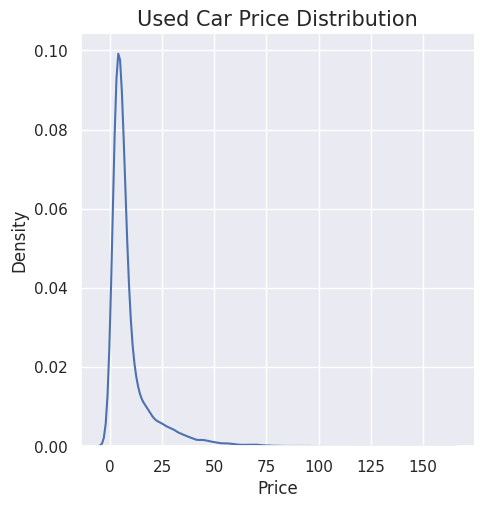

In [ ]:
#Distribution of Price

sns.displot(data=usedcarworksprice_df, x='Price', kind='kde')
plt.title("Used Car Price Distribution", fontsize=15)


Text(0.5, 1.0, 'New Car Price Distribution')

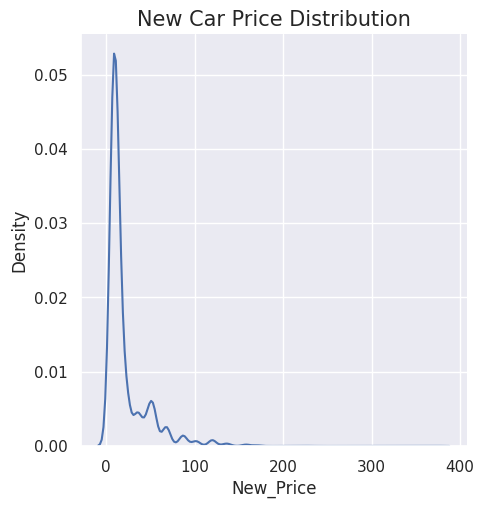

In [ ]:
#Distribution of New Price
sns.displot(data=usedcarworksprice_df, x='New_Price', kind='kde')
plt.title("New Car Price Distribution", fontsize=15)

In [ ]:
#Plot new price vs used price

Text(0.5, 1.0, 'Car Age Distribution')

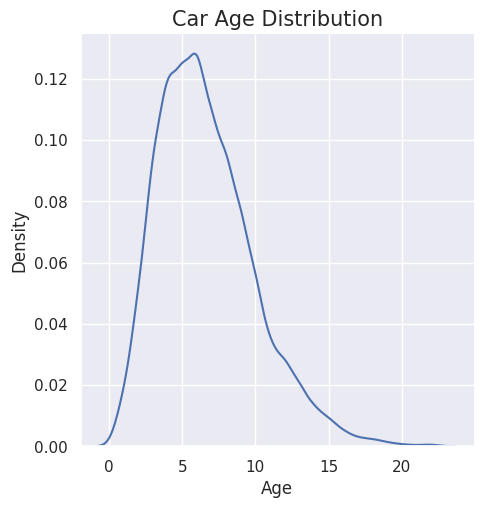

In [ ]:
#Distribution of Years
sns.displot(data=usedcarworksprice_df, x='Age', kind='kde')
plt.title("Car Age Distribution", fontsize=15)

Text(0.5, 1.0, 'Car Mileage-Fuel Unit (Consumption) Distribution')

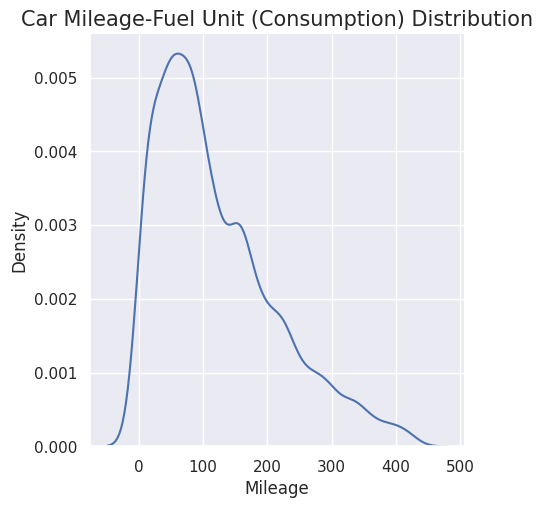

In [ ]:
#Distribution of Mileage
sns.displot(data=usedcarworksprice_df, x='Mileage', kind='kde')
plt.title("Car Mileage-Fuel Unit (Consumption) Distribution", fontsize=15)

Text(0.5, 1.0, 'Car Engine Size Distribution')

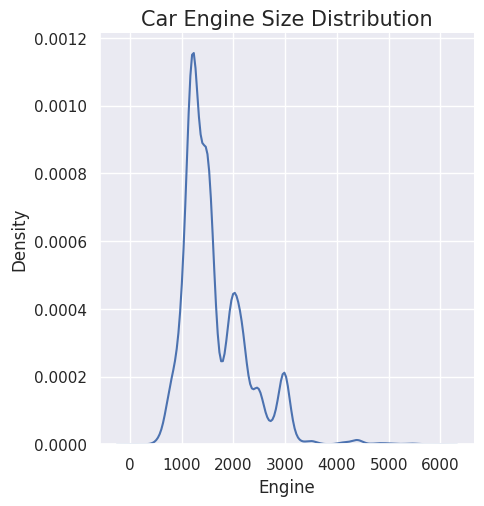

In [ ]:
#engine distribution
sns.displot(data=usedcarworksprice_df, x='Engine', kind='kde')
plt.title("Car Engine Size Distribution", fontsize=15)

Text(0.5, 1.0, 'Car Engine Power Distribution')

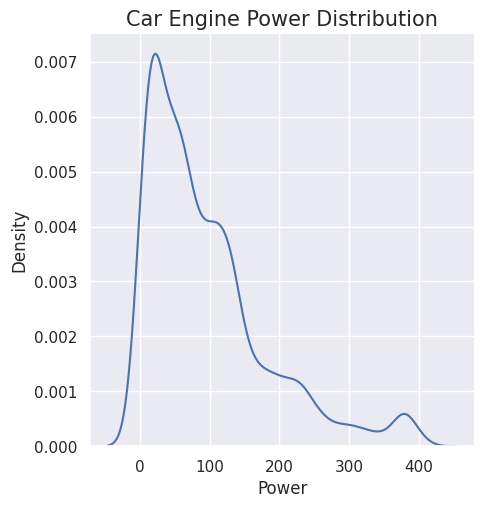

In [ ]:
#Power Distribution
sns.displot(data=usedcarworksprice_df, x='Power', kind='kde')
plt.title("Car Engine Power Distribution", fontsize=15)

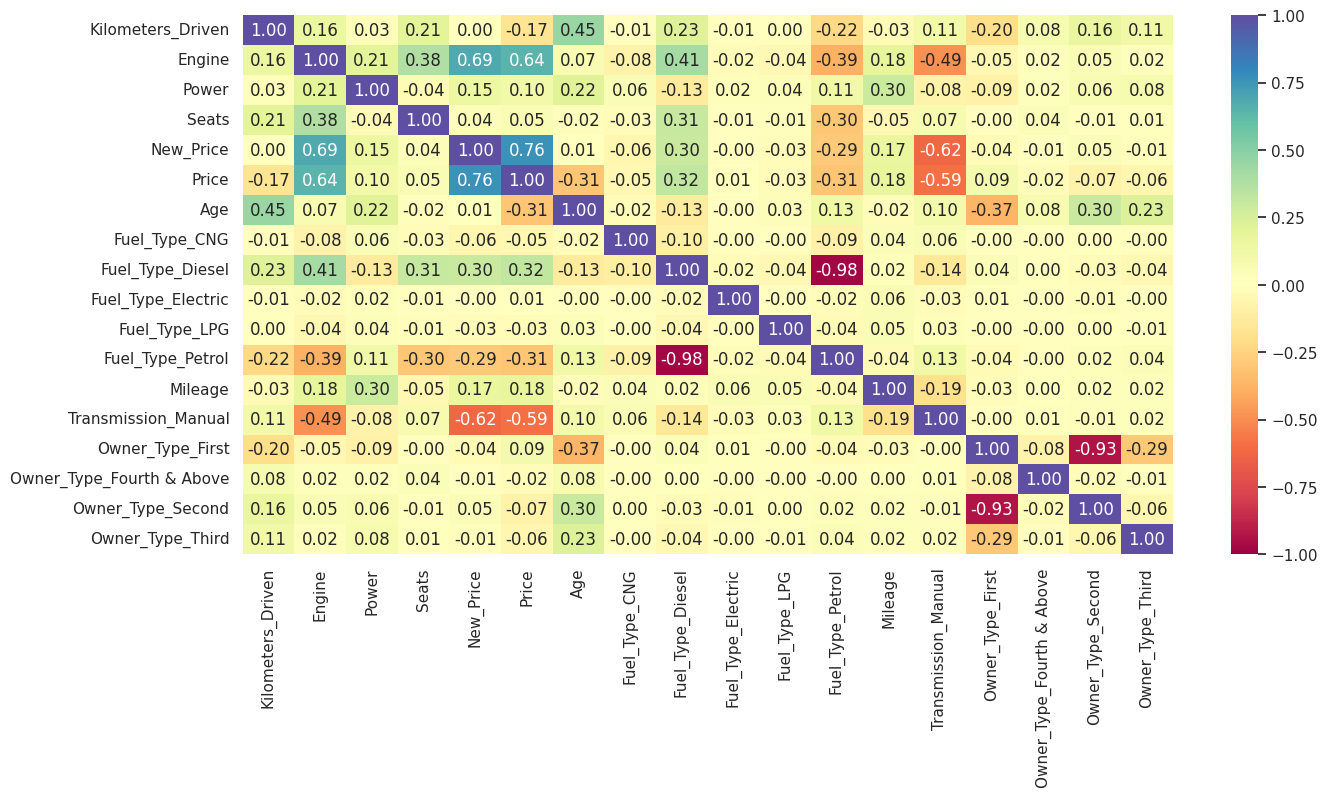

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    usedcarworksprice_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

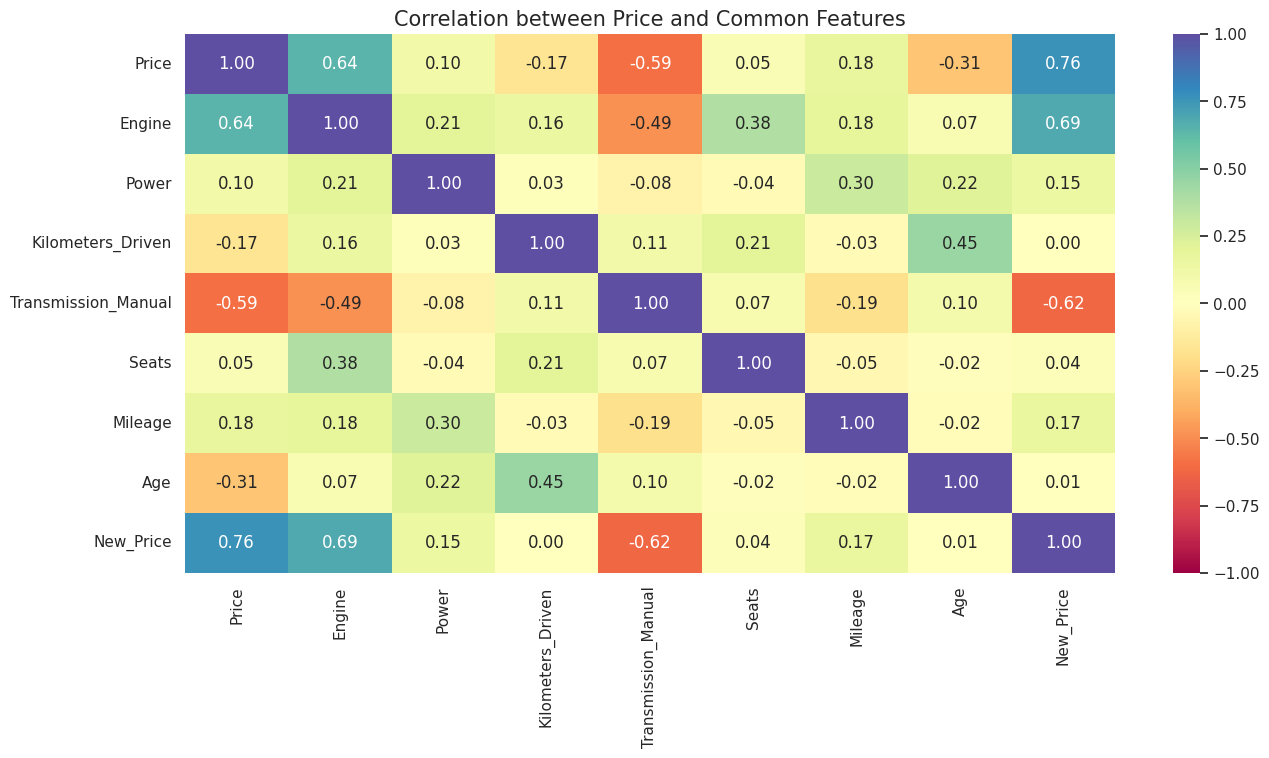

In [ ]:
#heatmap to visualize correlation for price and common features
plt.figure(figsize=(15,7))
sns.heatmap(

usedcarworksprice_df[['Price','Engine','Power','Kilometers_Driven','Transmission_Manual','Seats','Mileage','Age','New_Price']].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.title("Correlation between Price and Common Features", fontsize=15)
plt.show()


High Correlation (+/-1 ~  +/- 0.5)

- New Price 0.76
- Engine 0.64
- Transmission_Manual -0.59
- Age -0.31

Medium Correlation  (+/- 0.3 ~ +/- 0.49)

Low Correlation (+/- 0.29 and below)
- Mileage 0.18
- Kilometers_Driven -0.17
- Power 0.10
- Seats 0.05

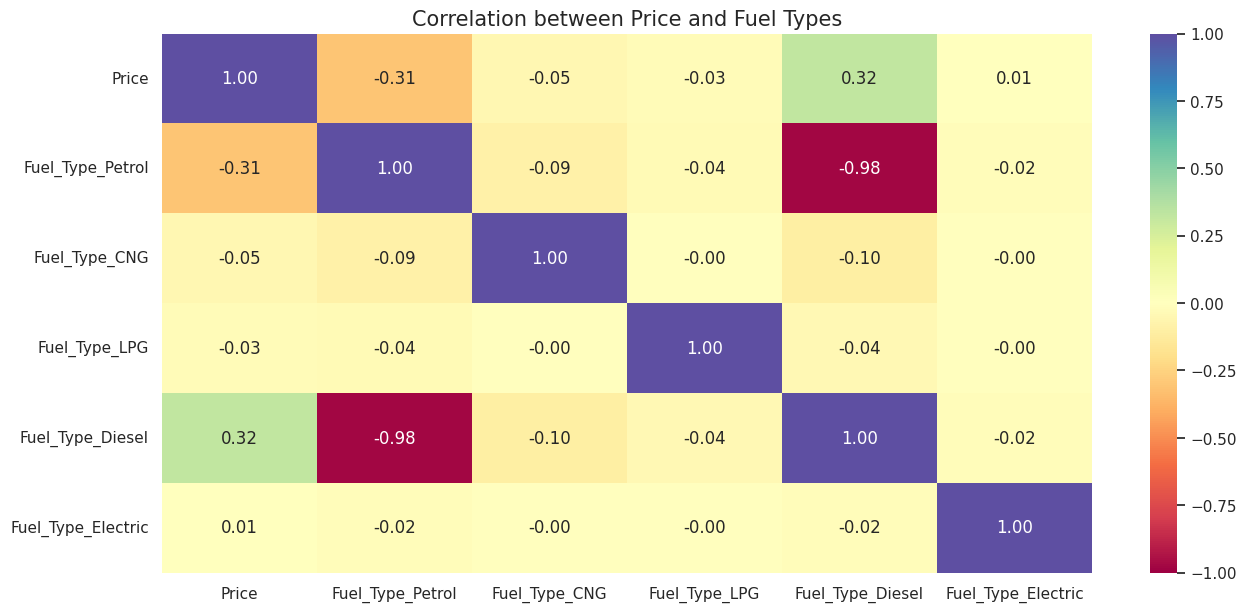

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(

usedcarworksprice_df[['Price','Fuel_Type_Petrol','Fuel_Type_CNG','Fuel_Type_LPG','Fuel_Type_Diesel','Fuel_Type_Electric']].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.title("Correlation between Price and Fuel Types", fontsize=15)
plt.show()

High Correlation (+/-1 ~  +/- 0.5)

- none

Medium Correlation  (+/- 0.3 ~ +/- 0.49)

- Fuel_Type_Diesel 0.32
- Fuel_Type_Petrol -0.31

Low Correlation (+/- 0.29 and below)
- All others


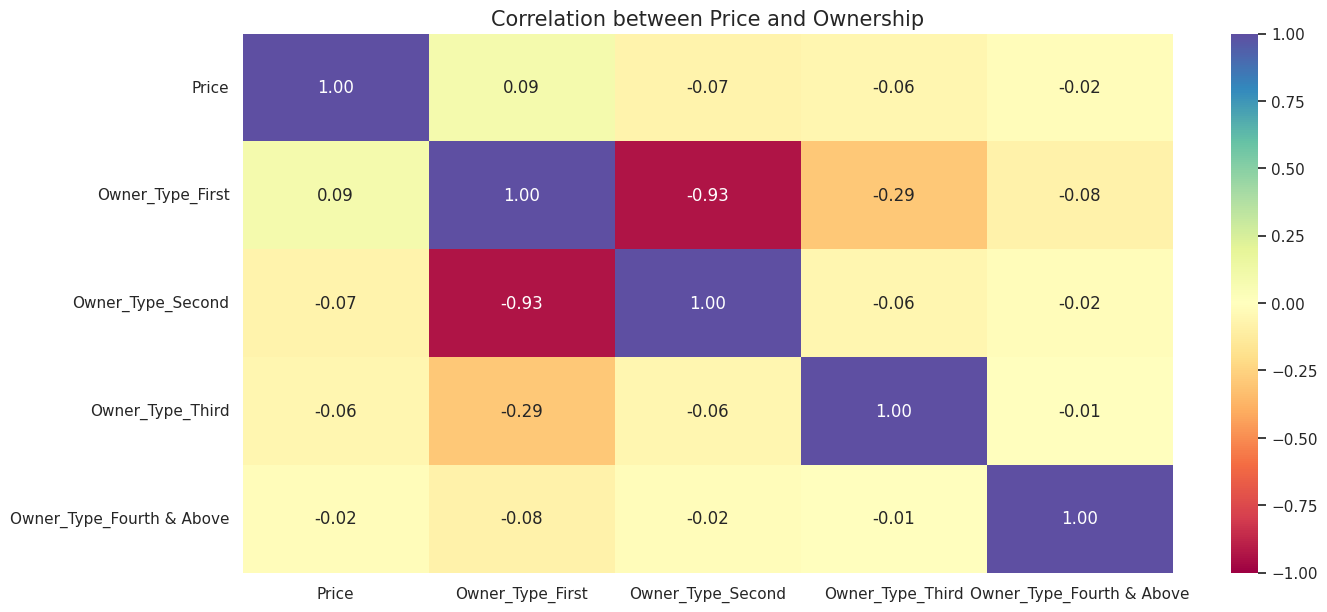

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(

usedcarworksprice_df[['Price','Owner_Type_First','Owner_Type_Second','Owner_Type_Third','Owner_Type_Fourth & Above']].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.title("Correlation between Price and Ownership", fontsize=15)
plt.show()

High Correlation (+/-1 ~ +/- 0.5)

- none

Medium Correlation (+/- 0.3 ~ +/- 0.49)

- none

Low Correlation (+/- 0.29 and below)

- all

<Figure size 4000x6000 with 0 Axes>

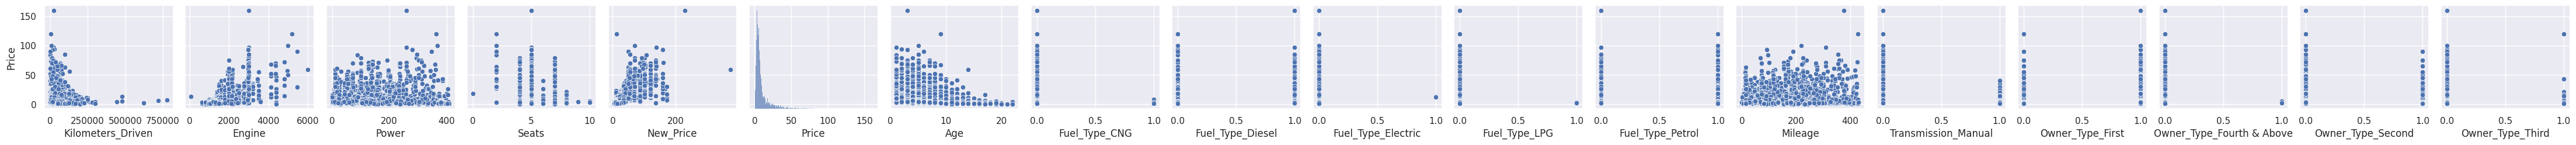

In [ ]:
plt.figure(figsize=(40, 60))
sns.pairplot(usedcarworksprice_df, y_vars="Price")
plt.show()

### **Revisit Name and Location**

In [ ]:
usedcarworksprice_df.head()

,Name,Location,Kilometers_Driven,Engine,Power,Seats,New_Price,Price,Brand,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti Wagon R LXI CNG,Mumbai,72000,998.00,0,5.00,5.51,1.75,Maruti,10,1,0,0,0,0,0,1,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,1582.00,1,5.00,16.06,12.50,Hyundai,5,0,1,0,0,0,1,1,1,0,0,0
2,Honda Jazz V,Chennai,46000,1199.00,2,5.00,8.61,4.50,Honda,9,0,0,0,0,1,2,1,1,0,0,0
3,Maruti Ertiga VDI,Chennai,87000,1248.00,3,7.00,11.27,6.00,Maruti,8,0,1,0,0,0,3,1,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,1968.00,4,5.00,53.14,17.74,Audi,7,0,1,0,0,0,4,0,0,0,1,0


In [ ]:
#How many brands?
print("There are ", usedcarworksprice_df['Brand'].nunique(), "car brands")

usedcarworksprice_df['Brand'].value_counts()


There are  31 car brands


Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               266
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land Rover         60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Smart               1
Name: Brand, dtype: int64

In [ ]:
#convert the locations to dummies, dont drop
#Convert Brand, don't drop any
usedcarworksprice_df = pd.get_dummies(usedcarworksprice_df, columns=['Location'])
usedcarworksprice_df = pd.get_dummies(usedcarworksprice_df, columns=['Brand'])
usedcarworksprice_df

,Name,Kilometers_Driven,Engine,Power,Seats,New_Price,Price,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,Maruti Wagon R LXI CNG,72000,998.00,0,5.00,5.51,1.75,10,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,41000,1582.00,1,5.00,16.06,12.50,5,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Honda Jazz V,46000,1199.00,2,5.00,8.61,4.50,9,0,0,0,0,1,2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,87000,1248.00,3,7.00,11.27,6.00,8,0,1,0,0,0,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,40670,1968.00,4,5.00,53.14,17.74,7,0,1,0,0,0,4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,Fiat Punto 1.2 Dynamic,17941,1200.00,407,5.00,8.60,3.93,3,0,0,0,0,1,327,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4952,Fiat Punto 1.4 Emotion,47000,1400.00,408,5.00,8.60,1.49,10,0,0,0,0,1,209,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5015,Maruti Swift 1.3 VXi,63000,1300.00,380,5.00,7.88,1.60,14,0,0,0,0,1,181,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5185,Maruti Swift 1.3 LXI,52000,1300.00,380,5.00,7.88,3.65,8,0,0,0,0,1,181,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


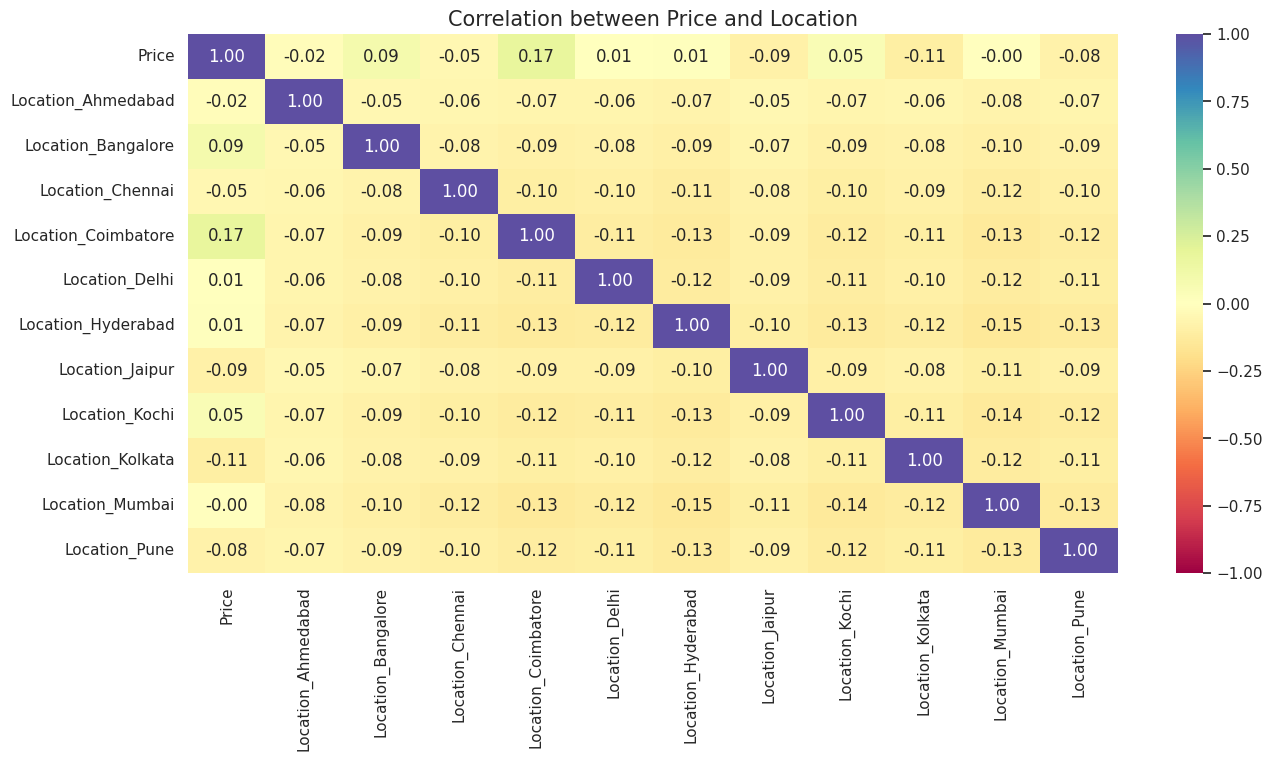

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(

usedcarworksprice_df[['Price','Location_Ahmedabad','Location_Bangalore','Location_Chennai','Location_Coimbatore','Location_Delhi','Location_Hyderabad','Location_Jaipur','Location_Kochi','Location_Kolkata','Location_Mumbai','Location_Pune']].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.title("Correlation between Price and Location", fontsize=15)
plt.show()

High Correlation (+/-1 ~ +/- 0.5)

- none

Medium Correlation (+/- 0.3 ~ +/- 0.49)

- none

Low Correlation (+/- 0.29 and below)

- all


Location doesn't seem to contribute to Price

In [ ]:
#visualize featues now including brands
usedcarworksprice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 5270
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       6018 non-null   object 
 1   Kilometers_Driven          6018 non-null   int64  
 2   Engine                     6018 non-null   float64
 3   Power                      6018 non-null   int64  
 4   Seats                      6018 non-null   float64
 5   New_Price                  6018 non-null   float64
 6   Price                      6018 non-null   float64
 7   Age                        6018 non-null   int64  
 8   Fuel_Type_CNG              6018 non-null   uint8  
 9   Fuel_Type_Diesel           6018 non-null   uint8  
 10  Fuel_Type_Electric         6018 non-null   uint8  
 11  Fuel_Type_LPG              6018 non-null   uint8  
 12  Fuel_Type_Petrol           6018 non-null   uint8  
 13  Mileage                    6018 non-null   int64

In [ ]:
#lets save car name in another dataframe for later use
carname_df = usedcarworksprice_df['Name']
carname_df

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
4697              Fiat Punto 1.2 Dynamic
4952              Fiat Punto 1.4 Emotion
5015                Maruti Swift 1.3 VXi
5185                Maruti Swift 1.3 LXI
5270                  Honda City 1.5 GXI
Name: Name, Length: 6018, dtype: object

In [ ]:
#drop the name of the car
usedcarworksprice_df.drop('Name', axis=1, inplace=True)
usedcarworksprice_df.head()

,Kilometers_Driven,Engine,Power,Seats,New_Price,Price,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,72000,998.00,0,5.00,5.51,1.75,10,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,41000,1582.00,1,5.00,16.06,12.50,5,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46000,1199.00,2,5.00,8.61,4.50,9,0,0,0,0,1,2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,87000,1248.00,3,7.00,11.27,6.00,8,0,1,0,0,0,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,40670,1968.00,4,5.00,53.14,17.74,7,0,1,0,0,0,4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


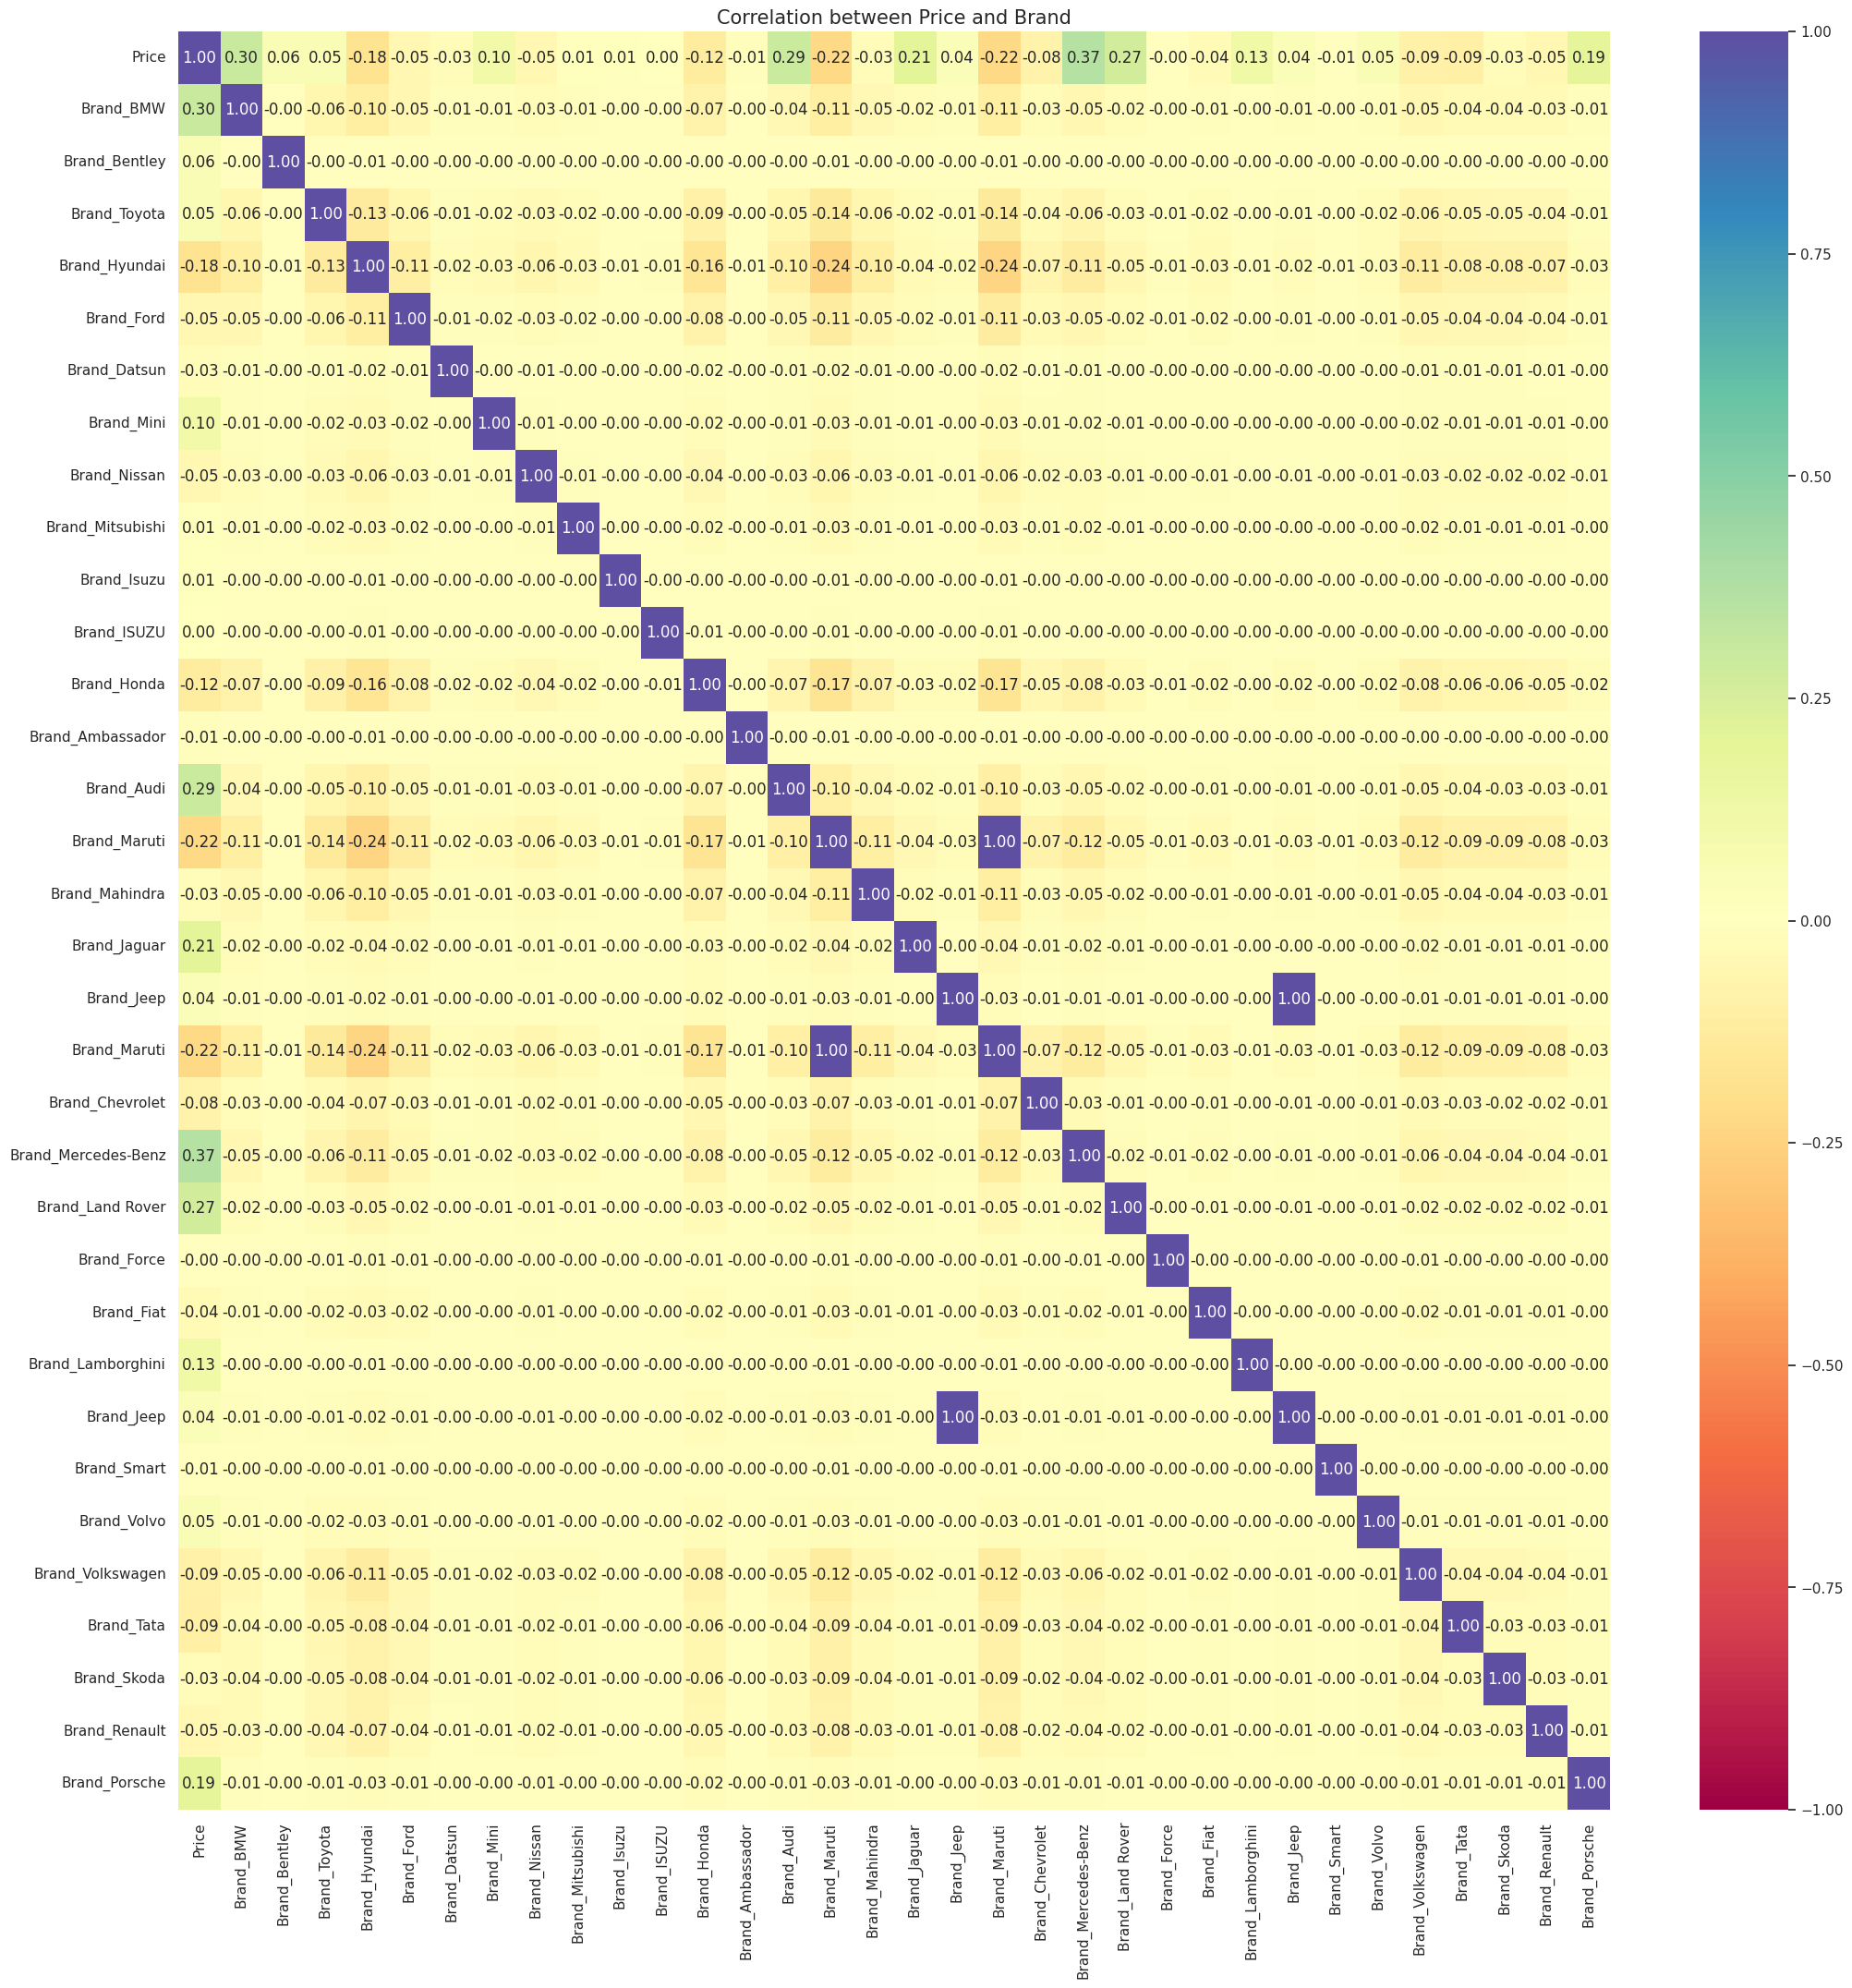

In [ ]:
#correlation between price and brands

plt.figure(figsize=(25,25))
sns.heatmap(

usedcarworksprice_df[['Price','Brand_BMW','Brand_Bentley','Brand_Toyota','Brand_Hyundai','Brand_Ford','Brand_Datsun','Brand_Mini',
                      'Brand_Nissan','Brand_Mitsubishi','Brand_Isuzu','Brand_ISUZU','Brand_Honda','Brand_Ambassador','Brand_Audi',
                      'Brand_Maruti','Brand_Mahindra','Brand_Jaguar','Brand_Jeep','Brand_Maruti','Brand_Chevrolet','Brand_Mercedes-Benz',
                      'Brand_Land Rover','Brand_Force','Brand_Fiat','Brand_Lamborghini','Brand_Jeep','Brand_Smart',
                     'Brand_Volvo','Brand_Volkswagen','Brand_Tata','Brand_Skoda', 'Brand_Renault', 'Brand_Porsche']
                     ].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.title("Correlation between Price and Brand", fontsize=15)
plt.show()

High Correlation (+/-1 ~ +/- 0.5)

- none

Medium Correlation (+/- 0.3 ~ +/- 0.49)
- Mercedes Benz

Low Correlation (+/- 0.29 and below)
- All others


These seem to add noise instead

## **Scaling**

The question of scaling. Is it necessary?

If we do not scale, how will a Price error look like, since we have a Max price of 160 and a min price of 0.44?


In [ ]:
from sklearn.preprocessing import StandardScaler

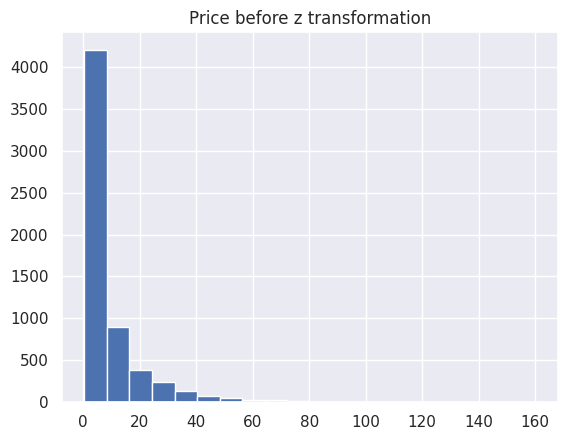

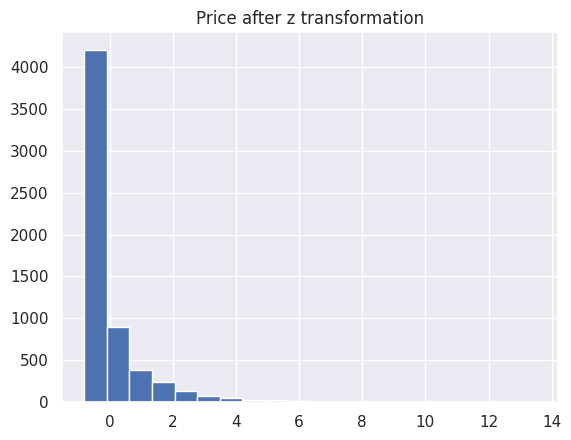

In [ ]:
std_scaler = StandardScaler()

usedcarworksprice_df['Price'].hist(bins=20)
plt.title('Price before z transformation')
plt.show()
# fit_transform requires a DataFrame, not a Series, hence
# the double brackets to keep usedcarworksprice_df[['Price']] as a 1 column
# DataFrame rather than a Series, like if I did usedcarworksprice_df['Price']


usedcarworksprice_df['price_z_std'] = std_scaler.fit_transform(usedcarworksprice_df[['Price']])
usedcarworksprice_df['price_z_std'].hist(bins=20)
plt.title('Price after z transformation')
plt.show()
# exact same shape since it's a linear transformation.
usedcarworksprice_df['Price'] = usedcarworksprice_df['price_z_std']
usedcarworksprice_df.drop(['price_z_std'], axis=1, inplace=True)


In [ ]:
usedcarworksprice_df

,Kilometers_Driven,Engine,Power,Seats,New_Price,Price,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Mileage,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,72000,998.00,0,5.00,5.51,-0.69,10,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,41000,1582.00,1,5.00,16.06,0.27,5,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46000,1199.00,2,5.00,8.61,-0.45,9,0,0,0,0,1,2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,87000,1248.00,3,7.00,11.27,-0.31,8,0,1,0,0,0,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,40670,1968.00,4,5.00,53.14,0.74,7,0,1,0,0,0,4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,17941,1200.00,407,5.00,8.60,-0.50,3,0,0,0,0,1,327,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4952,47000,1400.00,408,5.00,8.60,-0.71,10,0,0,0,0,1,209,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5015,63000,1300.00,380,5.00,7.88,-0.70,14,0,0,0,0,1,181,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5185,52000,1300.00,380,5.00,7.88,-0.52,8,0,0,0,0,1,181,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## **Training and Testing**

Split the data into train and test

In [ ]:
#which features are important
usedcarworksprice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 5270
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Kilometers_Driven          6018 non-null   int64  
 1   Engine                     6018 non-null   float64
 2   Power                      6018 non-null   int64  
 3   Seats                      6018 non-null   float64
 4   New_Price                  6018 non-null   float64
 5   Price                      6018 non-null   float64
 6   Age                        6018 non-null   int64  
 7   Fuel_Type_CNG              6018 non-null   uint8  
 8   Fuel_Type_Diesel           6018 non-null   uint8  
 9   Fuel_Type_Electric         6018 non-null   uint8  
 10  Fuel_Type_LPG              6018 non-null   uint8  
 11  Fuel_Type_Petrol           6018 non-null   uint8  
 12  Mileage                    6018 non-null   int64  
 13  Transmission_Manual        6018 non-null   uint8

In [ ]:
#Training and Testing
X= usedcarworksprice_df.drop(["Price"],axis = 1)
y= usedcarworksprice_df['Price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4212
Number of rows in test data = 1806


In [ ]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    #mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            #"MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.48,0.27,0.78,0.77


In [ ]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.46,0.26,0.76,0.76


- Train and test R2 are 0.77 and 0.76, which means that the model explains 77% and 76% of the total variation in the train and test sets respectively. Also both scores are comparable.

- RMSE scores in both training and testing sets are comparable, which means that the model is not overfitting.

- MAE, our model is able to predict prices within a mean error of 0.27/0.26, which is about 27% and 26%.

The overall performance is bad.

## **Rethinking the features to train**

Maybe some of the features we added only add noise to our model.
What if we remove locations and brands?

In [ ]:
#updated dataset
usedcarworksprice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 5270
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Kilometers_Driven          6018 non-null   int64  
 1   Engine                     6018 non-null   float64
 2   Power                      6018 non-null   int64  
 3   Seats                      6018 non-null   float64
 4   New_Price                  6018 non-null   float64
 5   Price                      6018 non-null   float64
 6   Age                        6018 non-null   int64  
 7   Fuel_Type_CNG              6018 non-null   uint8  
 8   Fuel_Type_Diesel           6018 non-null   uint8  
 9   Fuel_Type_Electric         6018 non-null   uint8  
 10  Fuel_Type_LPG              6018 non-null   uint8  
 11  Fuel_Type_Petrol           6018 non-null   uint8  
 12  Mileage                    6018 non-null   int64  
 13  Transmission_Manual        6018 non-null   uint8

In [ ]:
#lets remove columns 18 to 52 as we discovered earlier that they do not contribute much.

In [ ]:
improvedusedcar_df = usedcarworksprice_df.drop(['Brand_BMW','Brand_Bentley','Brand_Toyota','Brand_Hyundai','Brand_Ford','Brand_Datsun','Brand_Mini',
                      'Brand_Nissan','Brand_Mitsubishi','Brand_Isuzu','Brand_ISUZU','Brand_Honda','Brand_Ambassador','Brand_Audi',
                      'Brand_Maruti','Brand_Mahindra','Brand_Jaguar','Brand_Jeep','Brand_Maruti','Brand_Chevrolet','Brand_Mercedes-Benz',
                      'Brand_Land Rover','Brand_Force','Brand_Fiat','Brand_Lamborghini','Brand_Jeep','Brand_Smart',
                     'Brand_Volvo','Brand_Volkswagen','Brand_Tata','Brand_Skoda', 'Brand_Renault', 'Brand_Porsche','Location_Ahmedabad','Location_Bangalore','Location_Chennai','Location_Coimbatore','Location_Delhi','Location_Hyderabad','Location_Jaipur','Location_Kochi','Location_Kolkata','Location_Mumbai','Location_Pune'], axis=1)

In [ ]:
improvedusedcar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 5270
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Kilometers_Driven          6018 non-null   int64  
 1   Engine                     6018 non-null   float64
 2   Power                      6018 non-null   int64  
 3   Seats                      6018 non-null   float64
 4   New_Price                  6018 non-null   float64
 5   Price                      6018 non-null   float64
 6   Age                        6018 non-null   int64  
 7   Fuel_Type_CNG              6018 non-null   uint8  
 8   Fuel_Type_Diesel           6018 non-null   uint8  
 9   Fuel_Type_Electric         6018 non-null   uint8  
 10  Fuel_Type_LPG              6018 non-null   uint8  
 11  Fuel_Type_Petrol           6018 non-null   uint8  
 12  Mileage                    6018 non-null   int64  
 13  Transmission_Manual        6018 non-null   uint8

## **Retry Our model**

In [ ]:
#Training and Testing
X= improvedusedcar_df.drop(["Price"],axis = 1)
y= improvedusedcar_df['Price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4212
Number of rows in test data = 1806


In [ ]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.53,0.30,0.73,0.73


In [ ]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.48,0.29,0.74,0.74


Our model improved a little, since R2 was reduced.

## **Improve with Forward Feature Selection Using SequentialFeatureSelector**

In [ ]:
!pip install mlxtend

In [ ]:
!pip install joblib

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import joblib
import mlxtend
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    #n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    n_jobs=1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)


[2023-09-01 12:06:13] Features: 1/17 -- score: 0.568674190349858
[2023-09-01 12:06:13] Features: 2/17 -- score: 0.6676532951612832
[2023-09-01 12:06:14] Features: 3/17 -- score: 0.7013201296876399
[2023-09-01 12:06:14] Features: 4/17 -- score: 0.7095267830336398
[2023-09-01 12:06:14] Features: 5/17 -- score: 0.7144905409344757
[2023-09-01 12:06:15] Features: 6/17 -- score: 0.7170957013883257
[2023-09-01 12:06:16] Features: 7/17 -- score: 0.7185880334284287
[2023-09-01 12:06:17] Features: 8/17 -- score: 0.719523468910801
[2023-09-01 12:06:17] Features: 9/17 -- score: 0.7201106144172472
[2023-09-01 12:06:18] Features: 10/17 -- score: 0.7201471367890765
[2023-09-01 12:06:19] Features: 11/17 -- score: 0.7201671094431836
[2023-09-01 12:06:19] Features: 12/17 -- score: 0.720164541274315
[2023-09-01 12:06:20] Features: 13/17 -- score: 0.7201074871162803
[2023-09-01 12:06:20] Features: 14/17 -- score: 0.7201074871162803
[2023-09-01 12:06:20] Features: 15/17 -- score: 0.7199409508111616
[2023-

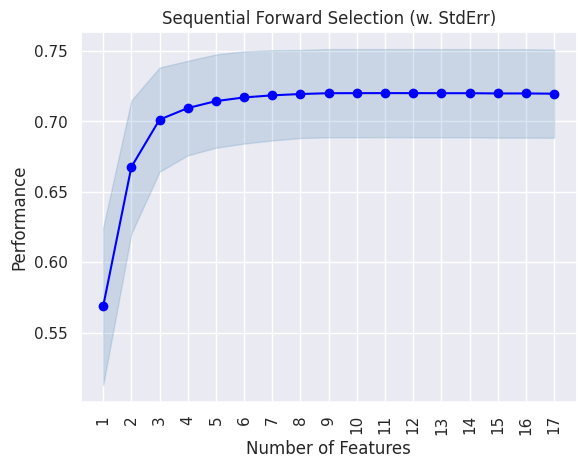

In [ ]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plot_sfs(sfs.get_metric_dict(), kind="std_err")
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

We can see that performance increases till the 6th feature and then slowly becomes constant.

The decision to choose the k_features now depends on the adjusted R2 vs the complexity of the model.

With 7 features, we are getting an adjusted R2 of 0.719.
With 12 features, we are getting an adjusted R2 of 0.72.
With 16 features, we are getting an adjusted R2 of 0.72.

The increase in adjusted R2 is not very significant as we are getting the same values with a less complex model.

We will experiment with 17

In [ ]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=17,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)


[2023-09-01 12:06:21] Features: 1/17 -- score: 0.568674190349858
[2023-09-01 12:06:22] Features: 2/17 -- score: 0.6676532951612832
[2023-09-01 12:06:22] Features: 3/17 -- score: 0.7013201296876399
[2023-09-01 12:06:22] Features: 4/17 -- score: 0.7095267830336398
[2023-09-01 12:06:23] Features: 5/17 -- score: 0.7144905409344757
[2023-09-01 12:06:23] Features: 6/17 -- score: 0.7170957013883257
[2023-09-01 12:06:23] Features: 7/17 -- score: 0.7185880334284287
[2023-09-01 12:06:24] Features: 8/17 -- score: 0.719523468910801
[2023-09-01 12:06:24] Features: 9/17 -- score: 0.7201106144172472
[2023-09-01 12:06:25] Features: 10/17 -- score: 0.7201471367890765
[2023-09-01 12:06:25] Features: 11/17 -- score: 0.7201671094431836
[2023-09-01 12:06:25] Features: 12/17 -- score: 0.720164541274315
[2023-09-01 12:06:26] Features: 13/17 -- score: 0.7201074871162803
[2023-09-01 12:06:26] Features: 14/17 -- score: 0.7201074871162803
[2023-09-01 12:06:26] Features: 15/17 -- score: 0.7199409508111616
[2023-

 Remember the columns

 0   Kilometers_Driven          6018 non-null   int64

 1   Engine                     6018 non-null   float64

 2   Power                      6018 non-null   int64

 3   Seats                      6018 non-null   float64

 4   New_Price                  6018 non-null   float64

 5   Price                      6018 non-null   float64

 6   Age                        6018 non-null   int64

 7   Fuel_Type_CNG              6018 non-null   uint8

 8   Fuel_Type_Diesel           6018 non-null   uint8

 9   Fuel_Type_Electric         6018 non-null   uint8

 10  Fuel_Type_LPG              6018 non-null   uint8

 11  Fuel_Type_Petrol           6018 non-null   uint8

 12  Mileage                    6018 non-null   int64

 13  Transmission_Manual        6018 non-null   uint8

 14  Owner_Type_First           6018 non-null   uint8

 15  Owner_Type_Fourth & Above  6018 non-null   uint8

 16  Owner_Type_Second          6018 non-null   uint8

 17  Owner_Type_Third           6018 non-null   uint8  

In [ ]:
# let us select the features which are important
#feat_cols = list(sfs.k_feature_idx_)
feat_cols = [1,4,6, 13]
print(feat_cols)

[1, 4, 6, 13]


In [ ]:
# let us look at the names of the important features
x_train.columns[feat_cols]

Index(['Engine', 'New_Price', 'Fuel_Type_CNG', 'Owner_Type_First'], dtype='object')

In [ ]:
x_train_final = x_train[x_train.columns[feat_cols]]

In [ ]:
# Creating new x_test with the same 20 variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

In [ ]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

LinearRegression()

In [ ]:
# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train
)
lin_reg_model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.63,0.35,0.62,0.62


In [ ]:
# model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test
)
lin_reg_model2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.56,0.32,0.65,0.65


In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.53,0.63
MAE,0.30,0.35
R-squared,0.73,0.62
Adj. R-squared,0.73,0.62


In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.48,0.56
MAE,0.29,0.32
R-squared,0.74,0.65
Adj. R-squared,0.74,0.65


In [ ]:
sns.pairplot(data=improvedusedcar_df, hue='Transmission_Manual', size=2.5);

Notice the following:

- Mean Squared Error(MSE) and Root Mean Square Error penalizes the large prediction errors vi-a-vis Mean Absolute Error (MAE). However, RMSE is widely used than MSE to evaluate the performance of the regression model with other random models as it has the same units as the dependent variable (Y-axis).

- The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.

- R Squared & Adjusted R Squared are used for explaining how well the independent variables in the linear regression model explains the variability in the dependent variable. R Squared value always increases with the addition of the independent variables which might lead to the addition of the redundant variables in our model. However, the adjusted R-squared solves this problem.

- Adjusted R squared takes into account the number of predictor variables, and it is used to determine the number of independent variables in our model. The value of Adjusted R squared decreases if the increase in the R square by the additional variable isn’t significant enough.

- For comparing the accuracy among different linear regression models, RMSE is a better choice than R Squared.


While both RMSE and R- Squared quantifies how well a linear regression model fits a dataset,  the RMSE tells how well a regression model can predict the value of a response variable in absolute terms and R- Squared tells how well the predictor variables can explain the variation in the response variable.

So, in our model we will be using sklearn Linear regression because it shows better peformance (Lower RMSE, Lower MAS, similar R2 and Ajdusted R2).


## **Conclusions and Recommendations**

- We have built a predictive model that can be used by UCars to predict the price of a used car with an R2 of 0.74 on the training set.
- Cars4U can use this model to predict the price of used cars within a mean error of 0.29.
- From the analysis, we found that the original price of the car when new, odometer reading and the age of the car were the most important features to consider when pricing a car (although they show not to have a large correlation in the heat map). Less important was engine size.
- Higher original price when new, less km on the odometer, less years will increase the selling price of the used car. The opposite will reduce the price.

- When selling a used car keep in mind the following:

> If the car had one, two, three, four or more owners, this will not affect the car price significantly.

> Focus on the most important factors that affect the car price:
   - Odometer reading
   - Age of the car
   - Original Price of the car when new

> Customers may pay more for Diesel cars.  Petrol is second. CNG, LPG, and Electric do not increase price.

> Cars that have an medium Power sell higher than those underpoweered and overpowered.

> Customers may pay more for Mercedes, Jaguar, BMW. But this may be related with the fact that these cars had the highest prices when new.

> Locations (where the car is) and Brands don't really play a significant role on pricing.

We can also explore improving the linear model by applying non-linear transformations to some of the attributes. This might help us better identify the patterns in the data to predict the anime ratings more accurately.


**Final Recommendations:**

Focus on selling cars that have these things in common:
1. Were expensive when new.
2. Have lower miles on the odometer
3. Are less than 10 years old
4. Diesel and Petrol cars.
5. Have an engine size between 2000 and 4000cc
6. Customer may pay slightly more for Automatic Transmission cars.

Do not Focus so much on:
5. How many owners the car had before
6. Engine Power
7. Brand

Use our model to estimate the selling price but keep in mind that the model can only accurately has an R2 of 0.74.



